# Import dataset

In [128]:
import pandas as pd
file_id = "1GDYBbxFmmkn8m2vabLMGtli-G9baXFwm"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df1 = pd.read_csv(url, encoding="ISO-8859-1")
df1.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class


In [129]:
file_id = "1bFK0cUe-MVmUYDrA4KKzrUFMpKsiAgSw"
url = f"https://drive.google.com/uc?export=download&id={file_id}"
df2 = pd.read_csv(url, encoding="ISO-8859-1")
df2.head(3)

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [131]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469977 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     469977 non-null  object
 1   Category    469977 non-null  object
 2   Date        469977 non-null  object
 3   Month       469977 non-null  object
 4   Hour        469977 non-null  int64 
 5   Department  469977 non-null  object
 6   ip          469977 non-null  object
 7   url         469977 non-null  object
dtypes: int64(1), object(7)
memory usage: 28.7+ MB


#Data CLean

##Drop unnecessary columns

In [132]:
df1.drop(columns=['Customer Email','Customer Fname','Customer Lname',
                  'Customer Password','Customer Street','Order Zipcode',
                  'Product Card Id','Product Category Id','Product Description',
                  'Product Image','Product Status'], inplace=True)

##Check duplicated

In [133]:
duplicates = df1.duplicated().sum()
print(f"Number of duplicate rows:{duplicates}")
duplicates = df2.duplicated().sum()
print(f"Number of duplicate rows:{duplicates}")

Number of duplicate rows:0
Number of duplicate rows:3249


In [134]:
#Drop Duplicates from df2
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466728 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Product     466728 non-null  object
 1   Category    466728 non-null  object
 2   Date        466728 non-null  object
 3   Month       466728 non-null  object
 4   Hour        466728 non-null  int64 
 5   Department  466728 non-null  object
 6   ip          466728 non-null  object
 7   url         466728 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.0+ MB


##Missing Value

In [135]:
missing_values = df1.isnull().sum()
print(missing_values)

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 3
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod Id           0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Id       

In [136]:
from IPython.display import display
missing_rows = df1[df1["Customer Zipcode"].isnull()]
display(missing_rows['Customer Zipcode'])


,Customer Zipcode
35704,NaN
46440,NaN
82511,NaN


In [137]:
df1.dropna(subset=["Customer Zipcode"], inplace=True)
df1.isna().sum()

,0
Type,0
Days for shipping (real),0
Days for shipment (scheduled),0
Benefit per order,0
Sales per customer,0
Delivery Status,0
Late_delivery_risk,0
Category Id,0
Category Name,0
Customer City,0


In [138]:
missing_values = df2.isnull().sum()
print(missing_values)

Product       0
Category      0
Date          0
Month         0
Hour          0
Department    0
ip            0
url           0
dtype: int64


In [139]:
cate_col = df1.select_dtypes(include='object')
for col in cate_col:
  print(df1[col].value_counts())
  print('\n\n\n\n')

Type
DEBIT       69293
TRANSFER    49883
PAYMENT     41724
CASH        19616
Name: count, dtype: int64





Delivery Status
Late delivery        98976
Advance shipping     41592
Shipping on time     32194
Shipping canceled     7754
Name: count, dtype: int64





Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               837
Children's Clothing       651
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Gar

In [140]:
df1["Customer Country"] = df1["Customer Country"].replace("EE. UU.", "United States")
df1["Customer Country"].unique()

array(['Puerto Rico', 'United States'], dtype=object)

## Time Series Variables

In [141]:
df1['order date (DateOrders)'] = pd.to_datetime(df1['order date (DateOrders)'])
df1['shipping date (DateOrders)'] = pd.to_datetime(df1['shipping date (DateOrders)'])
df2['Date'] = pd.to_datetime(df2['Date'])

# EDA

## DF1

### Numeric Variables

<Axes: >

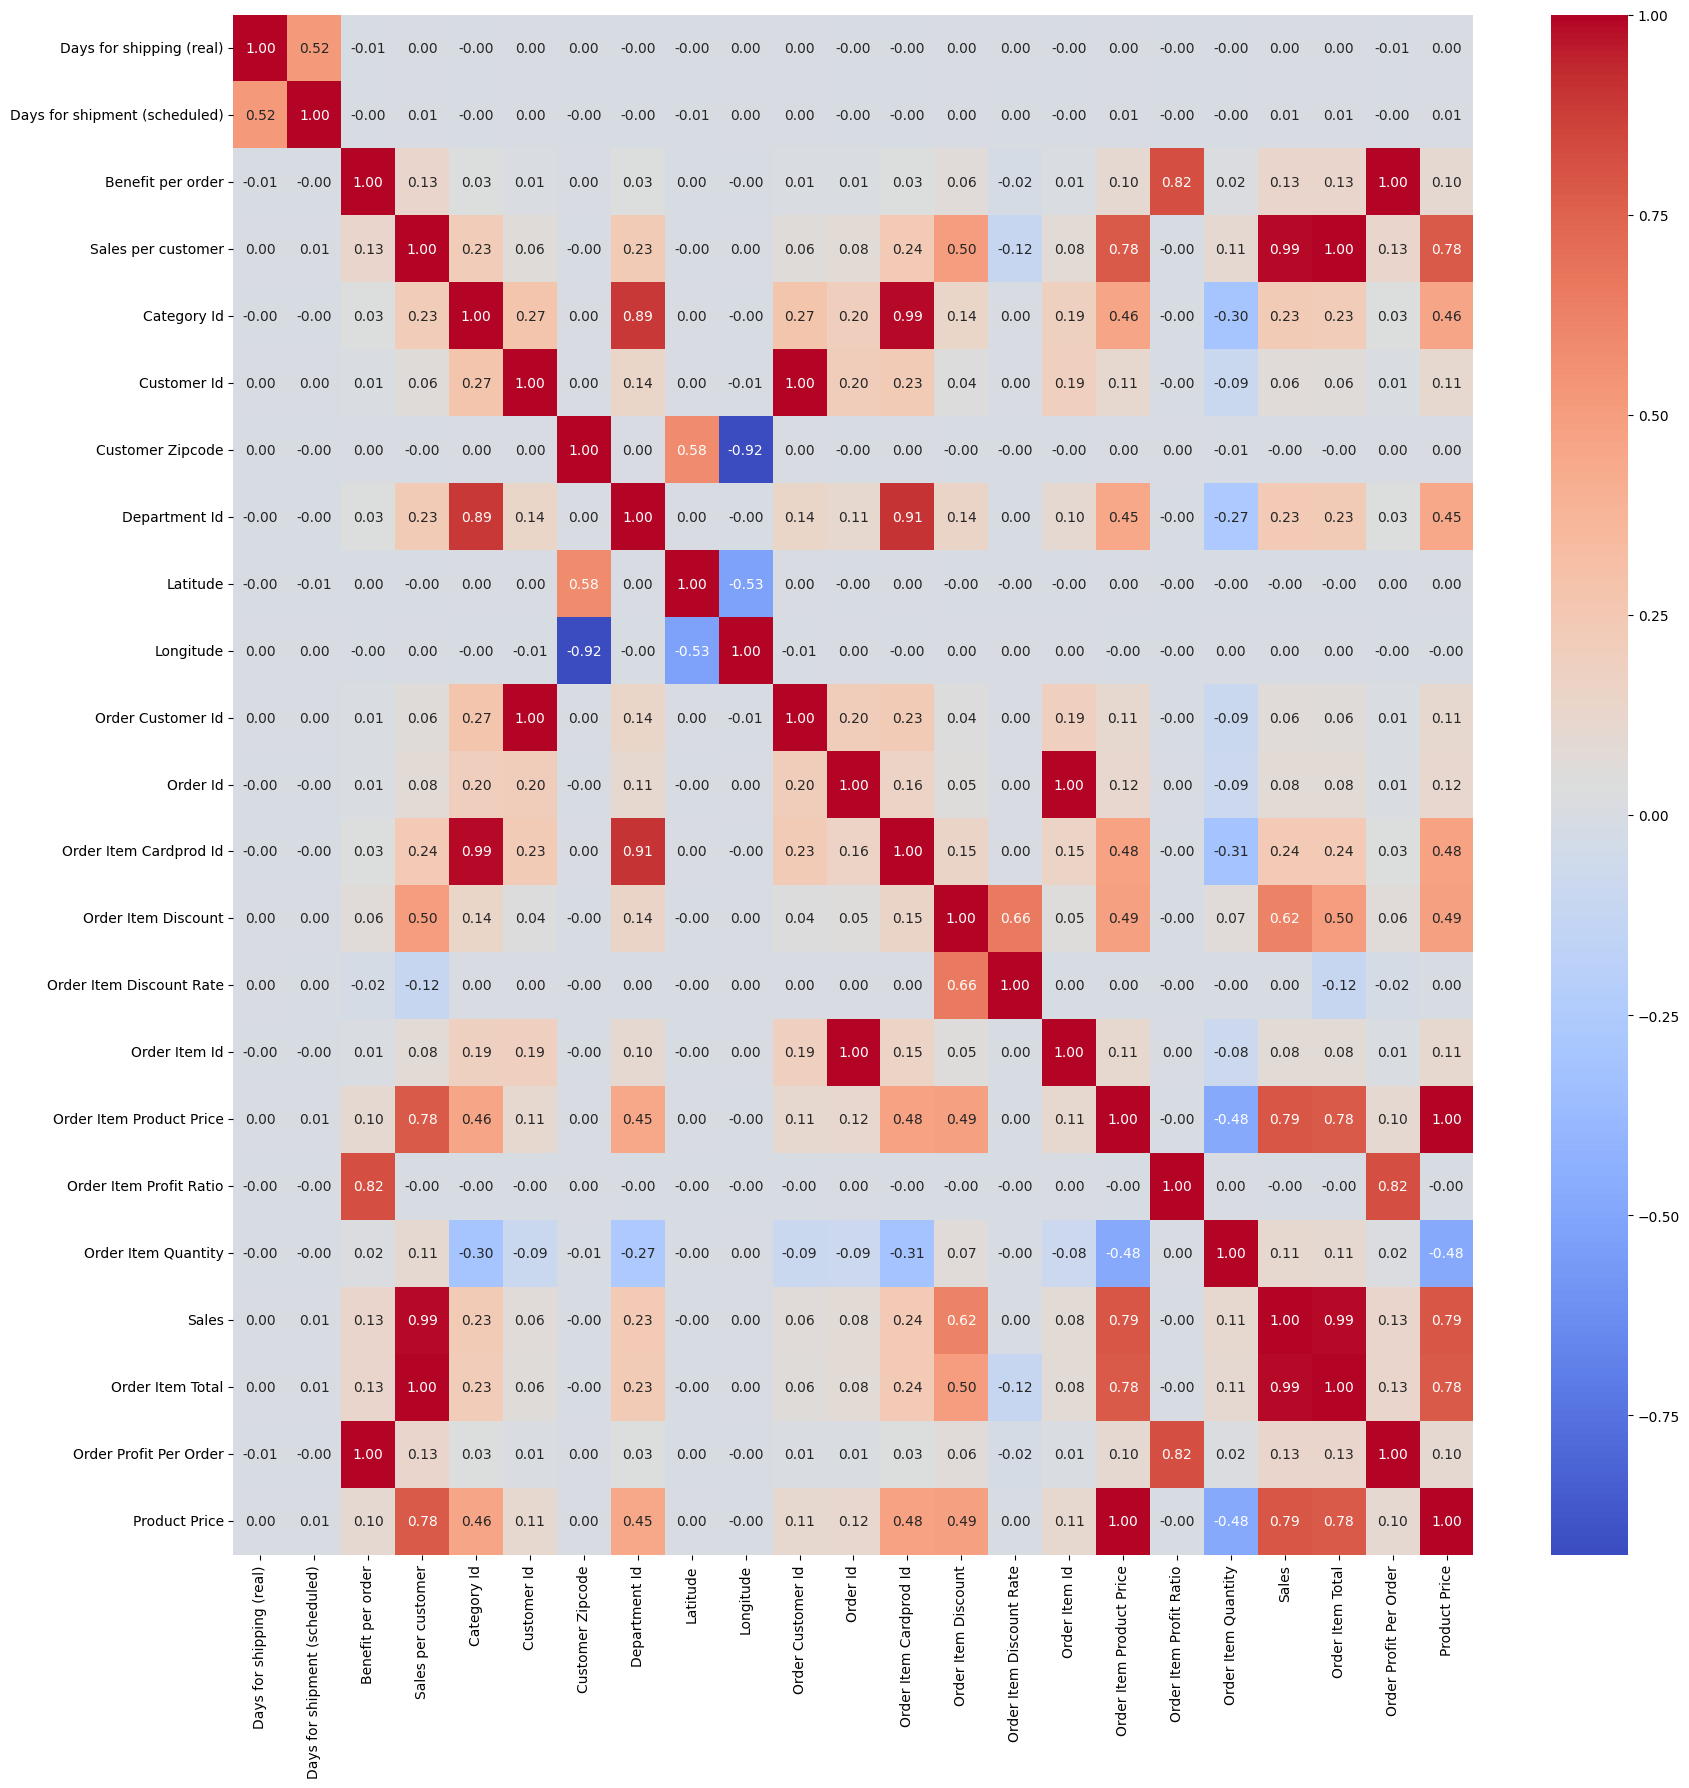

In [142]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
int_columns = df1.select_dtypes(include=['int','float64'])

#Categorical but int: Late_delivery_risk
int_columns = int_columns.drop('Late_delivery_risk', axis = 1)
corr = int_columns.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

<Axes: >

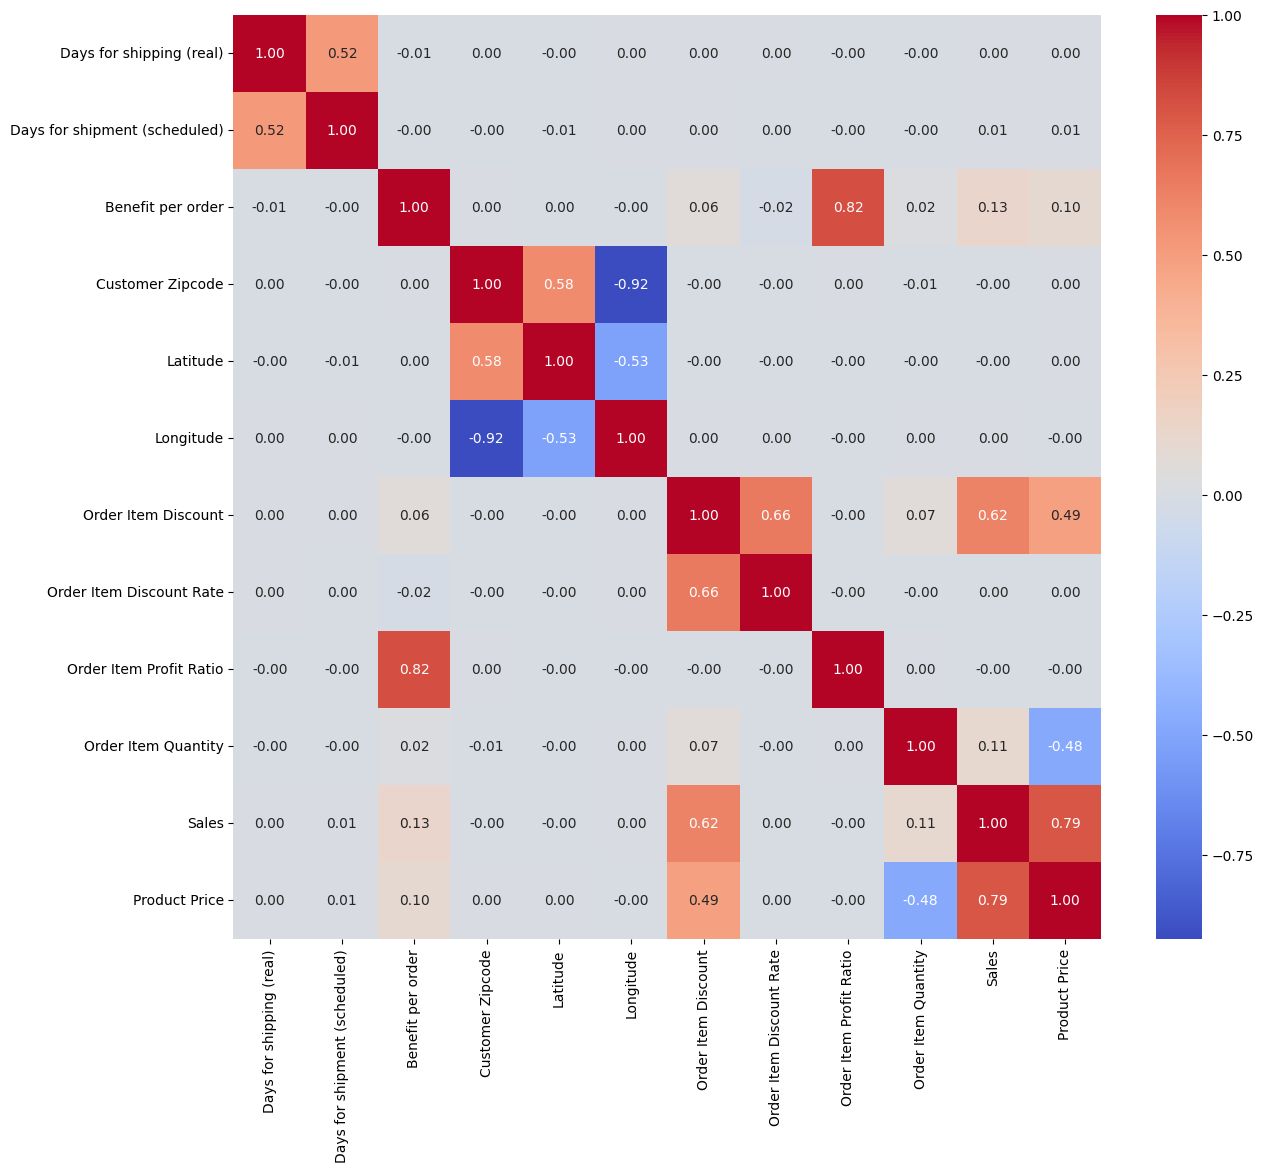

In [143]:
# Since some columns's correlation is 1 or 0.999, so we drop some of them
data = df1.drop(columns = ['Order Profit Per Order','Sales per customer','Order Item Total',
                           'Order Item Cardprod Id','Order Customer Id','Order Item Id',
                           'Order Item Product Price'])
num_col=data.select_dtypes(include=['int','float64']).drop('Late_delivery_risk', axis = 1)
num_col_no_id = [col for col in num_col.columns if 'id' not in col.lower()]
plt.figure(figsize=(14, 12))
sns.heatmap(data[num_col_no_id].corr(), annot=True, fmt=".2f", cmap='coolwarm')

**Take a look the distrubtion of numeric variables**

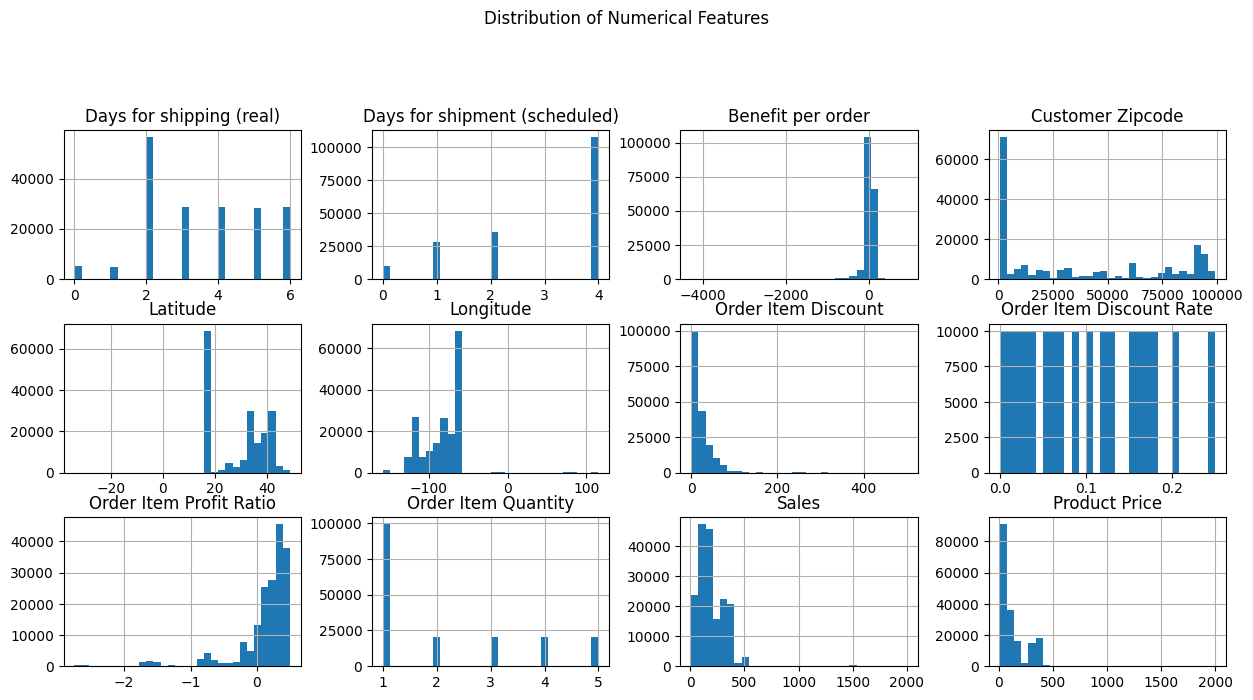

In [144]:
import numpy as np
data[num_col_no_id].hist(figsize=(15, 12), bins=30, layout=(5, 4))
plt.suptitle("Distribution of Numerical Features")
plt.show()

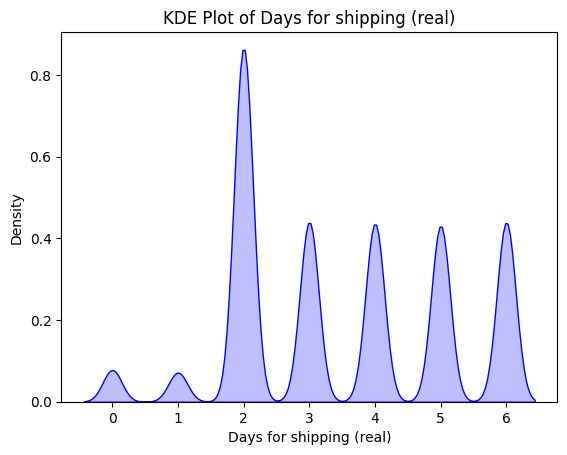

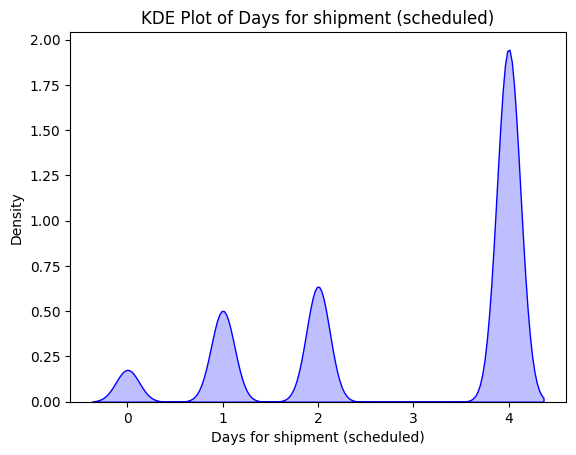

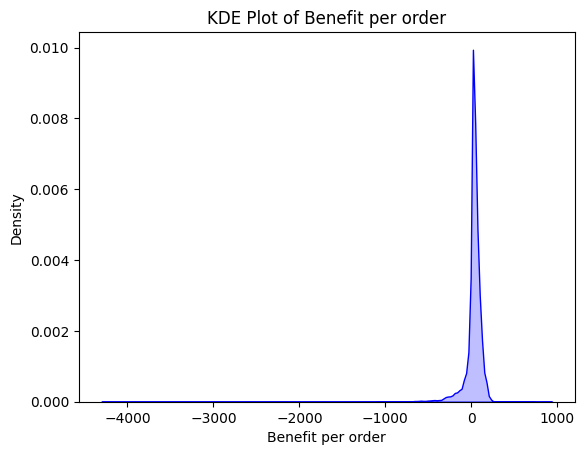

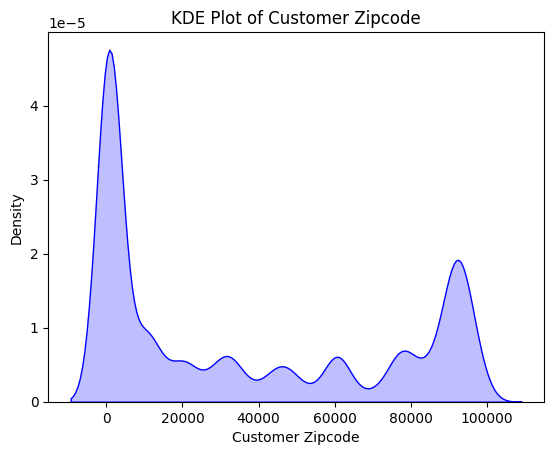

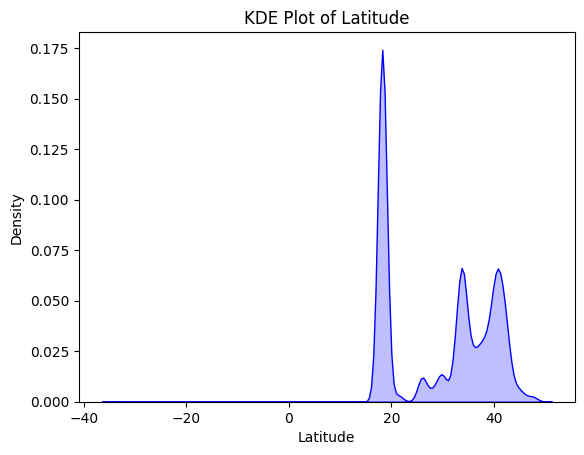

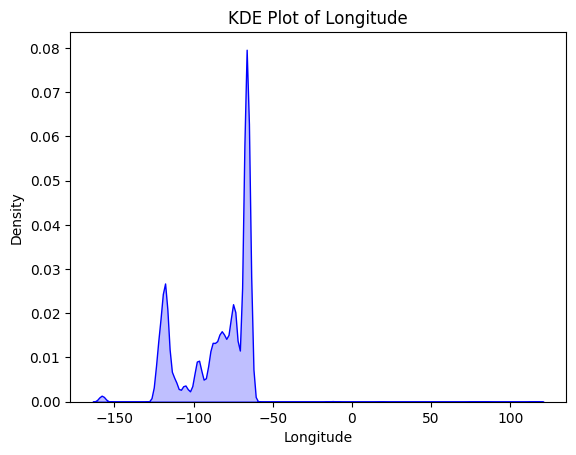

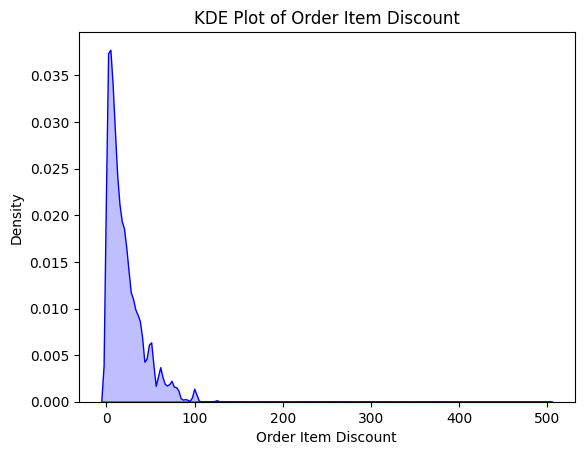

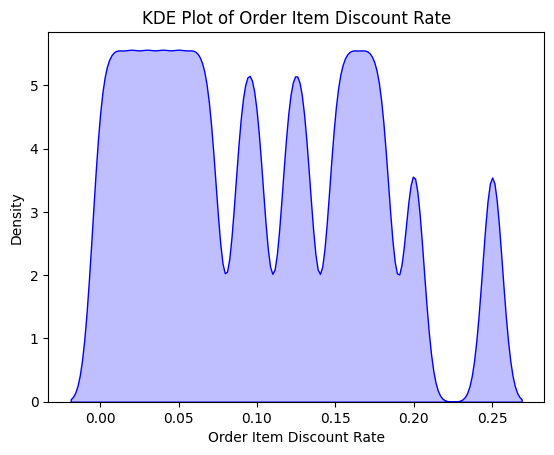

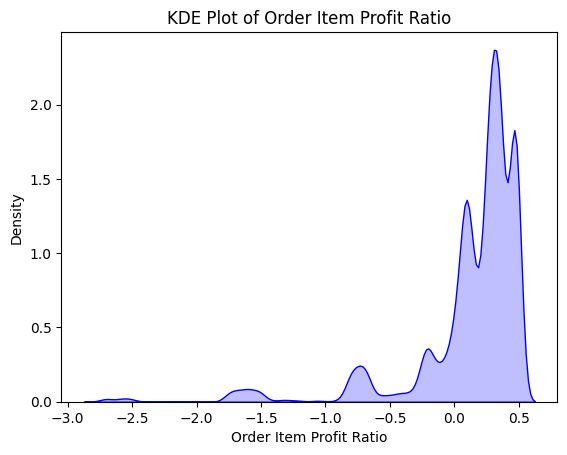

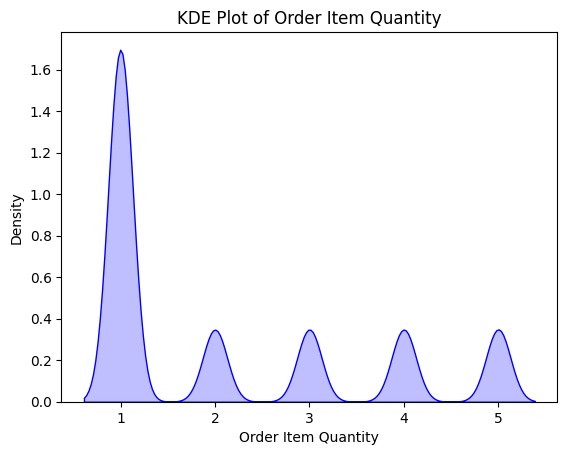

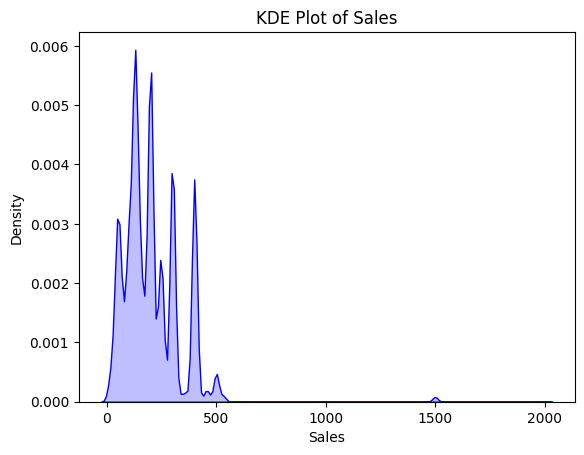

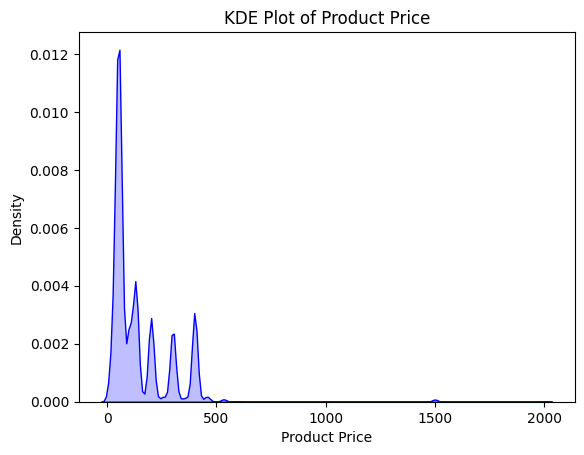

In [145]:
for col in num_col_no_id:
    sns.kdeplot(data[col], fill=True, color='blue')
    plt.title(f"KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [146]:
skew_values = pd.DataFrame(data[num_col_no_id].skew().reset_index())
skew_values2 = skew_values[abs(skew_values[0]) > 1]
skew_values2

,index,0
2,Benefit per order,-4.741797
6,Order Item Discount,3.039940
8,Order Item Profit Ratio,-2.893501
10,Sales,2.884304
11,Product Price,3.191093


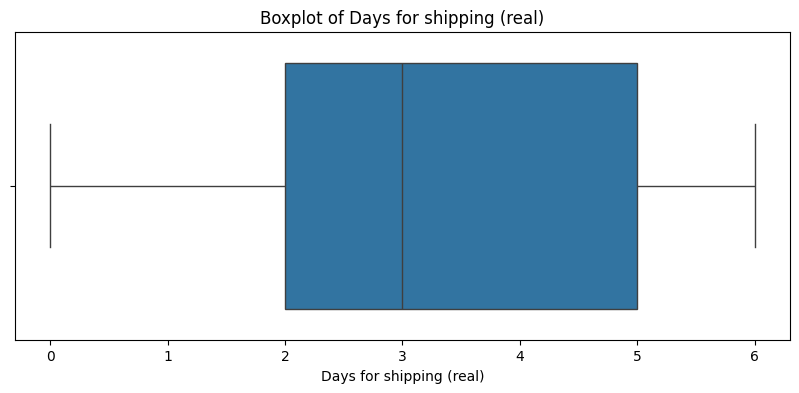

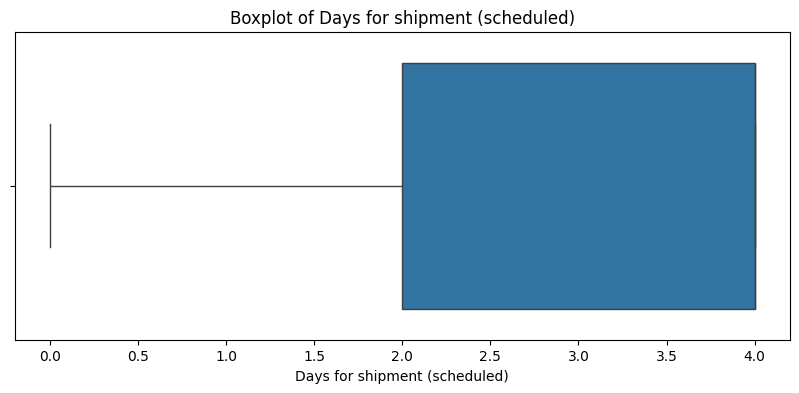

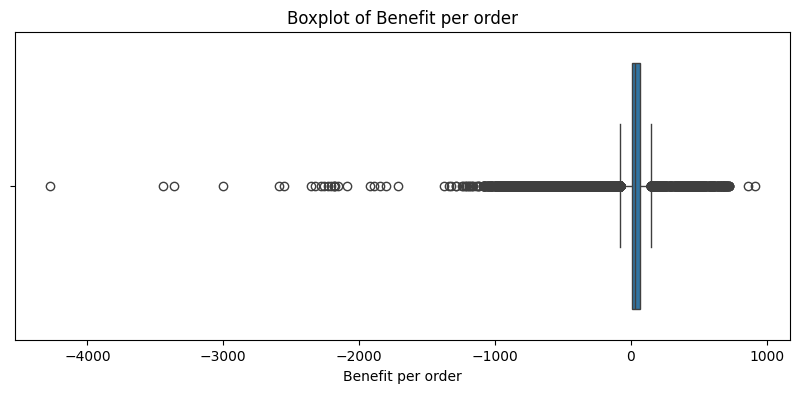

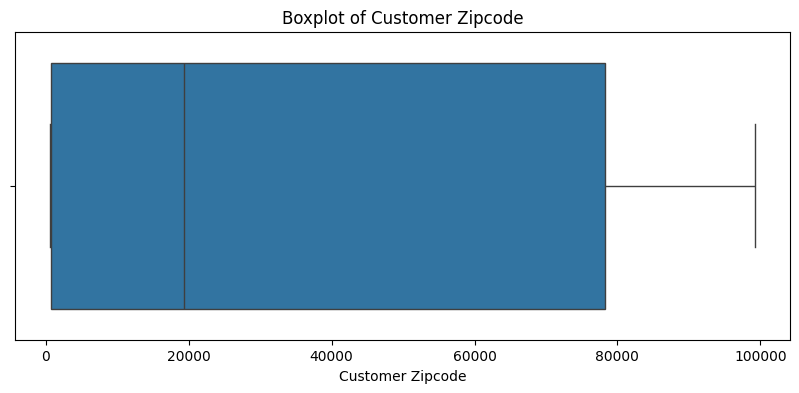

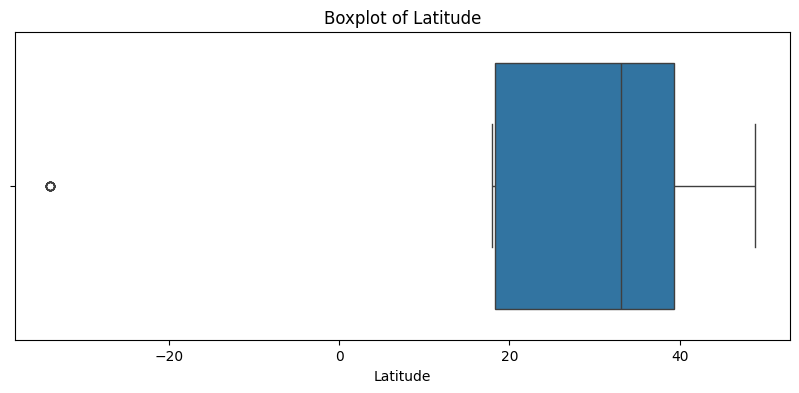

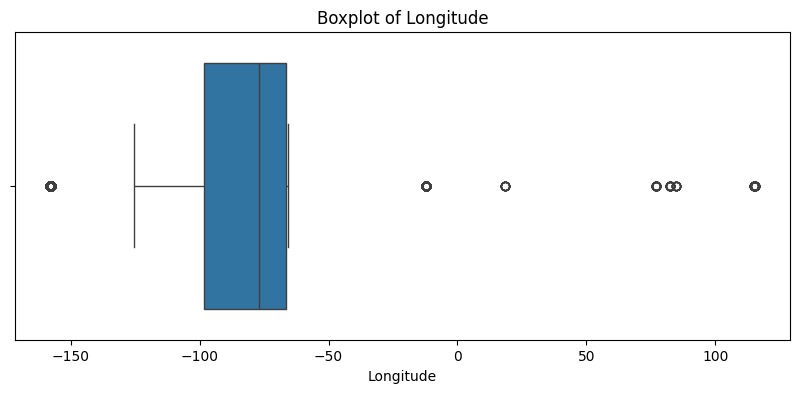

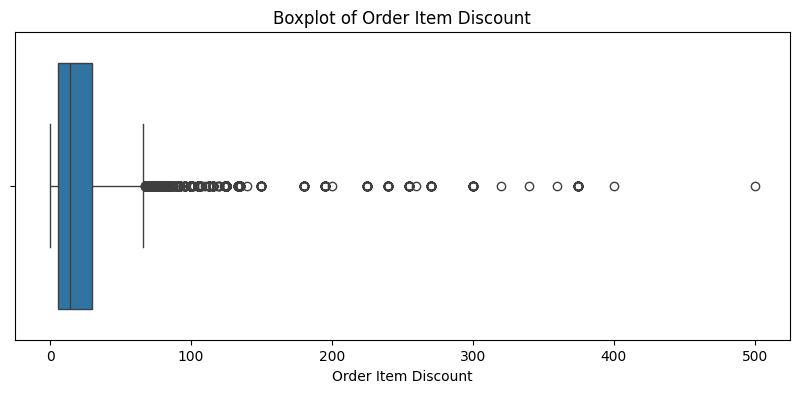

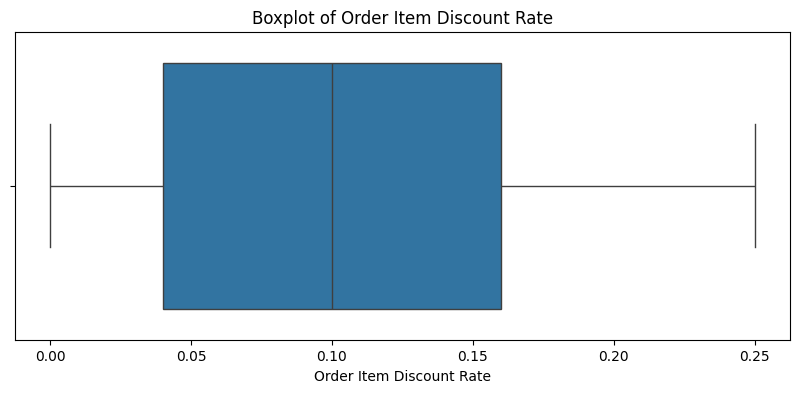

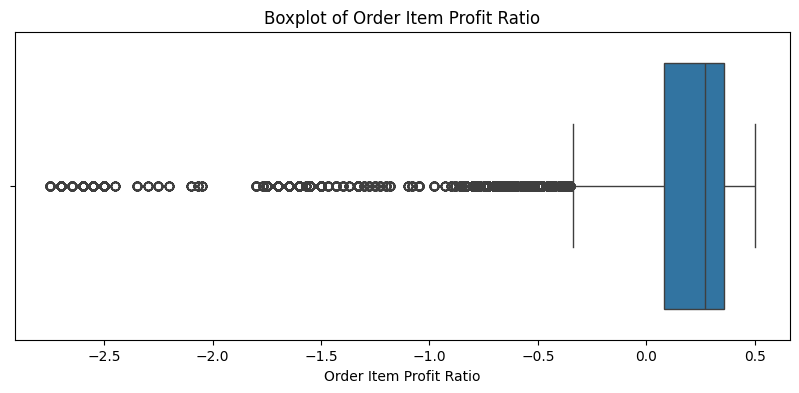

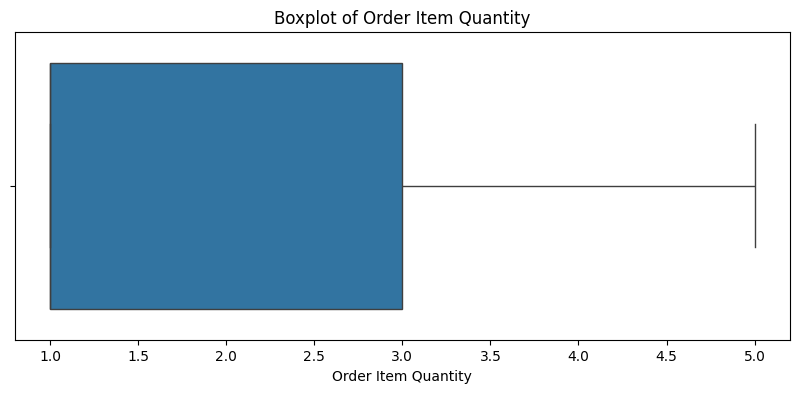

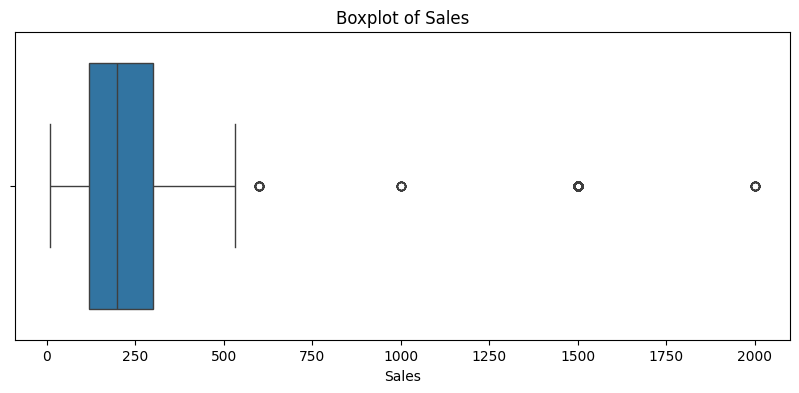

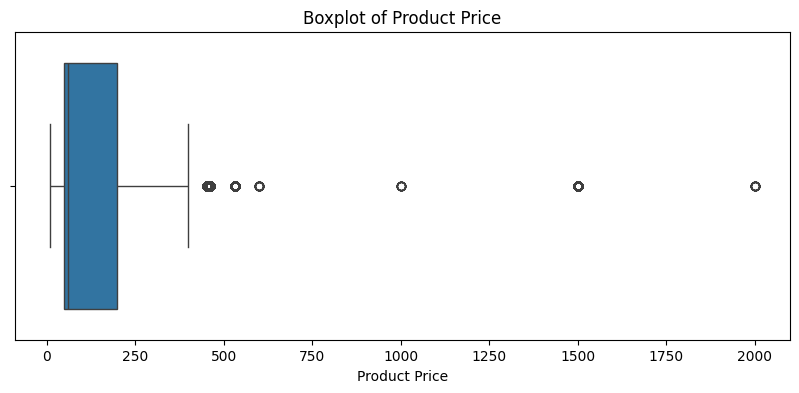

In [147]:
#Boxplot for original dataset
import seaborn as sns

for col in num_col_no_id:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [148]:
# use log and exp to reduce skews
import numpy as np

right_skewed_cols = ['Order Item Discount', 'Sales', 'Product Price']
data[right_skewed_cols] = data[right_skewed_cols].apply(lambda x: np.log1p(x))

left_skewed_cols = ['Benefit per order', 'Order Item Profit Ratio']
data[left_skewed_cols] = data[left_skewed_cols].apply(lambda x: np.exp(x))

print(data.isnull().sum())

Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Id                      0
Customer Segment                 0
Customer State                   0
Customer Zipcode                 0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
order date (DateOrders)          0
Order Id                         0
Order Item Discount              0
Order Item Discount Rate         0
Order Item Profit Ratio          0
Order Item Quantity              0
Sales                            0
Order Region        

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning:

overflow encountered in exp



In [149]:
data.shape

(180516, 35)

In [150]:
import numpy as np

for col in data[num_col_no_id]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df1_filtered = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Data size before removing outliers:{data.shape}")
print(f"Data size after removing outliers:{df1_filtered.shape}")

Data size before removing outliers:(180516, 35)
Data size after removing outliers:(180501, 35)


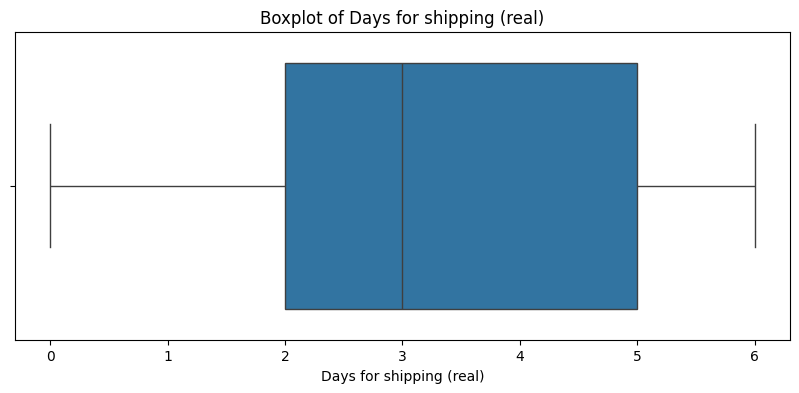

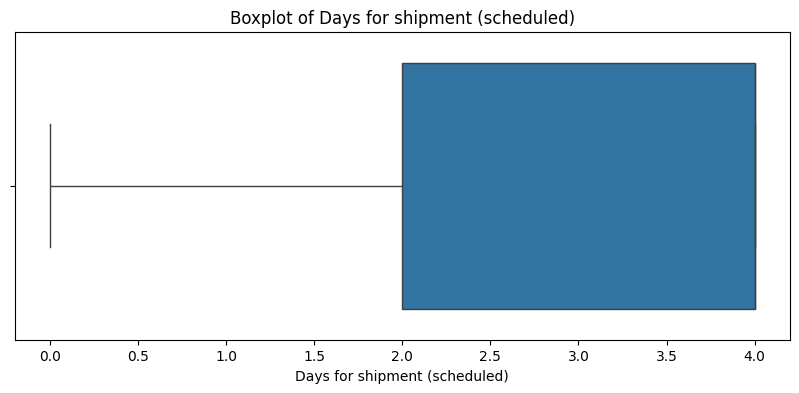

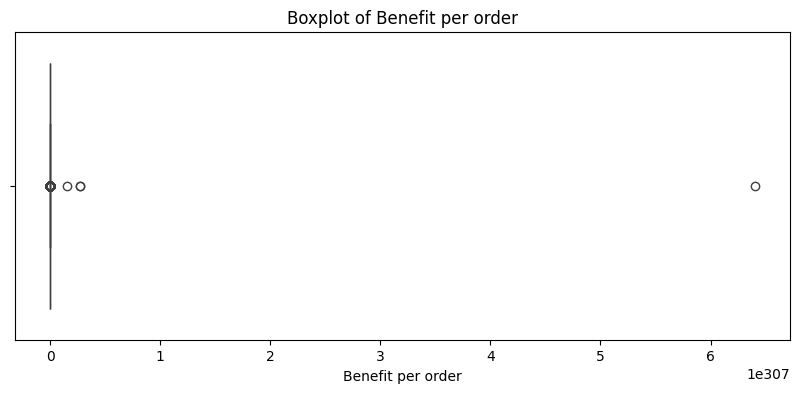

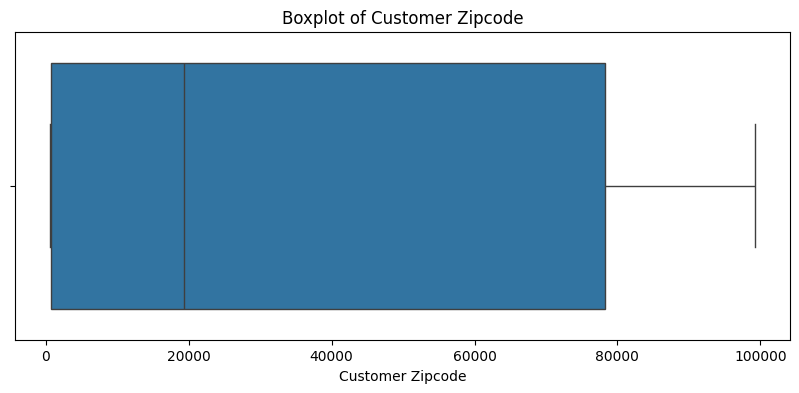

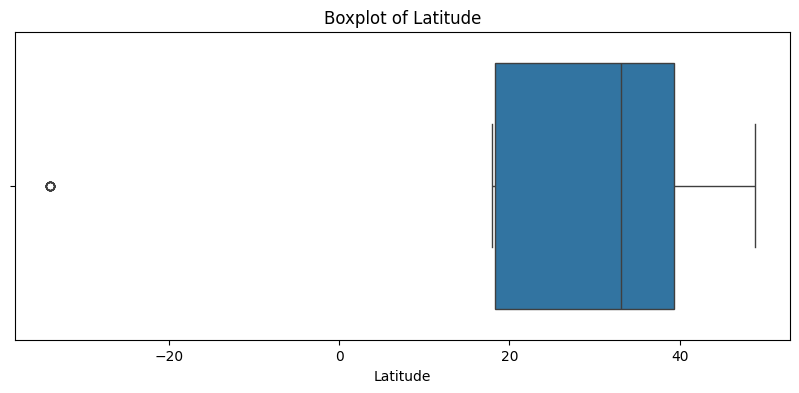

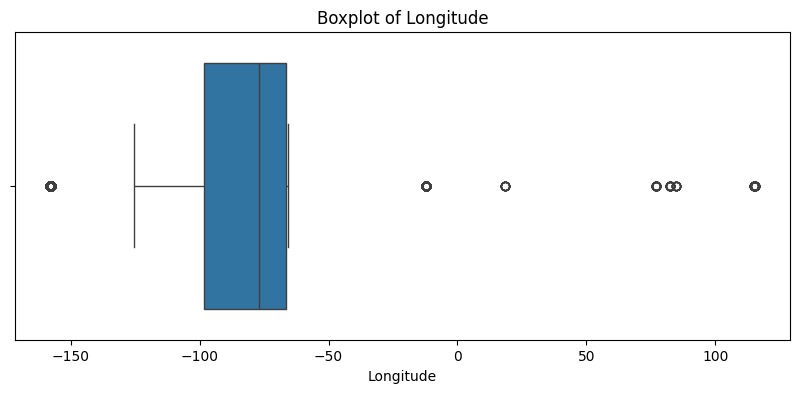

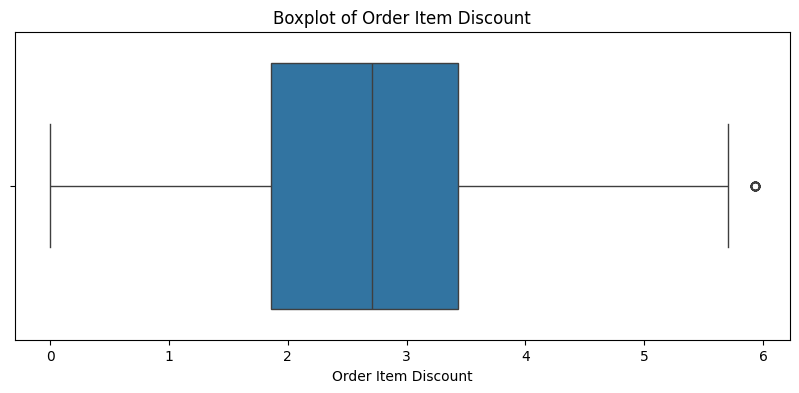

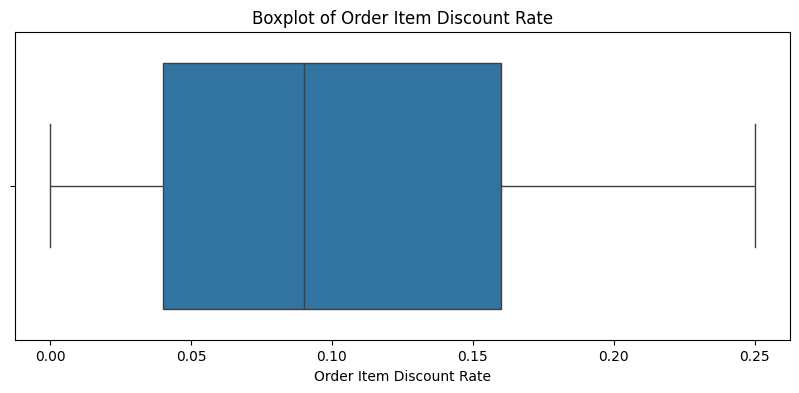

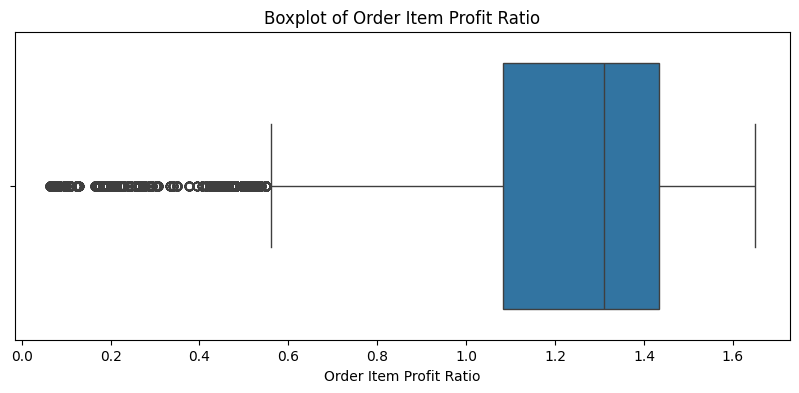

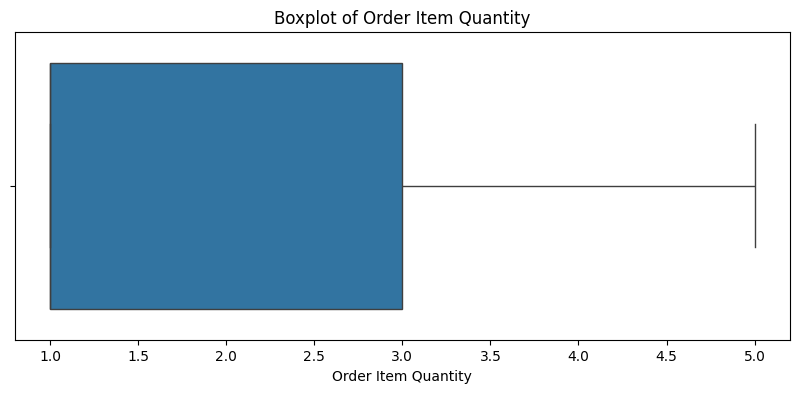

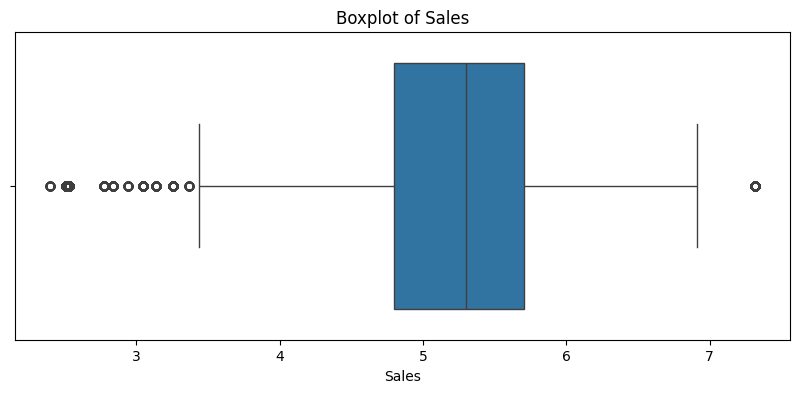

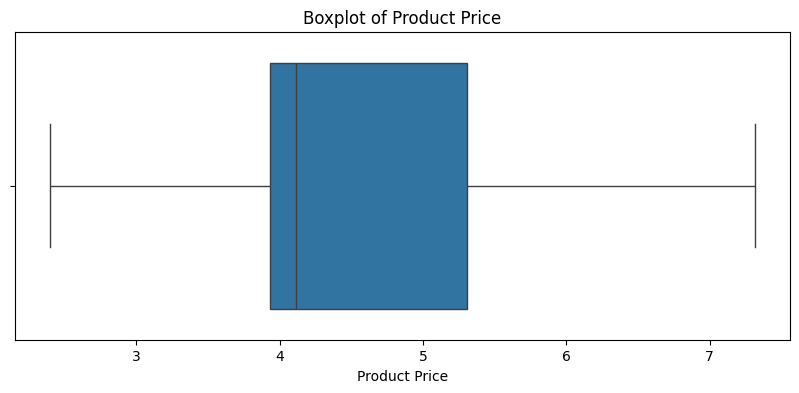

In [151]:
#Boxplot for filted dataset
import seaborn as sns

for col in num_col_no_id:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df1_filtered[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


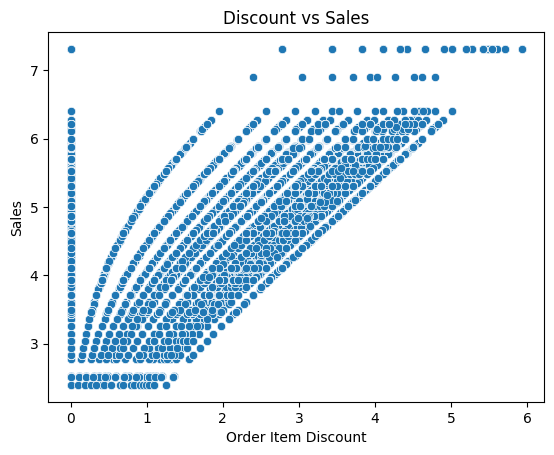

In [152]:
sns.scatterplot(x=df1_filtered['Order Item Discount'], y=df1_filtered['Sales'])
plt.title("Discount vs Sales")
plt.show()

### Categorical Variables

In [153]:
cate_col = df1_filtered.select_dtypes(include='object')
cate_col['Late_delivery_risk'] = df1_filtered['Late_delivery_risk']
for col in cate_col:
  print(df1_filtered[col].value_counts())
  print('\n\n\n\n')

Type
DEBIT       69280
TRANSFER    49882
PAYMENT     41724
CASH        19615
Name: count, dtype: int64





Delivery Status
Late delivery        98970
Advance shipping     41588
Shipping on time     32189
Shipping canceled     7754
Name: count, dtype: int64





Category Name
Cleats                  24551
Men's Footwear          22246
Women's Apparel         21035
Indoor/Outdoor Games    19298
Fishing                 17325
Water Sports            15540
Camping & Hiking        13729
Cardio Equipment        12487
Shop By Sport           10984
Electronics              3156
Accessories              1780
Golf Balls               1475
Girls' Apparel           1201
Golf Gloves              1070
Trade-In                  974
Video Games               837
Children's Clothing       651
Women's Clothing          650
Baseball & Softball       632
Hockey                    614
Cameras                   592
Toys                      529
Golf Shoes                524
Pet Supplies              492
Gar

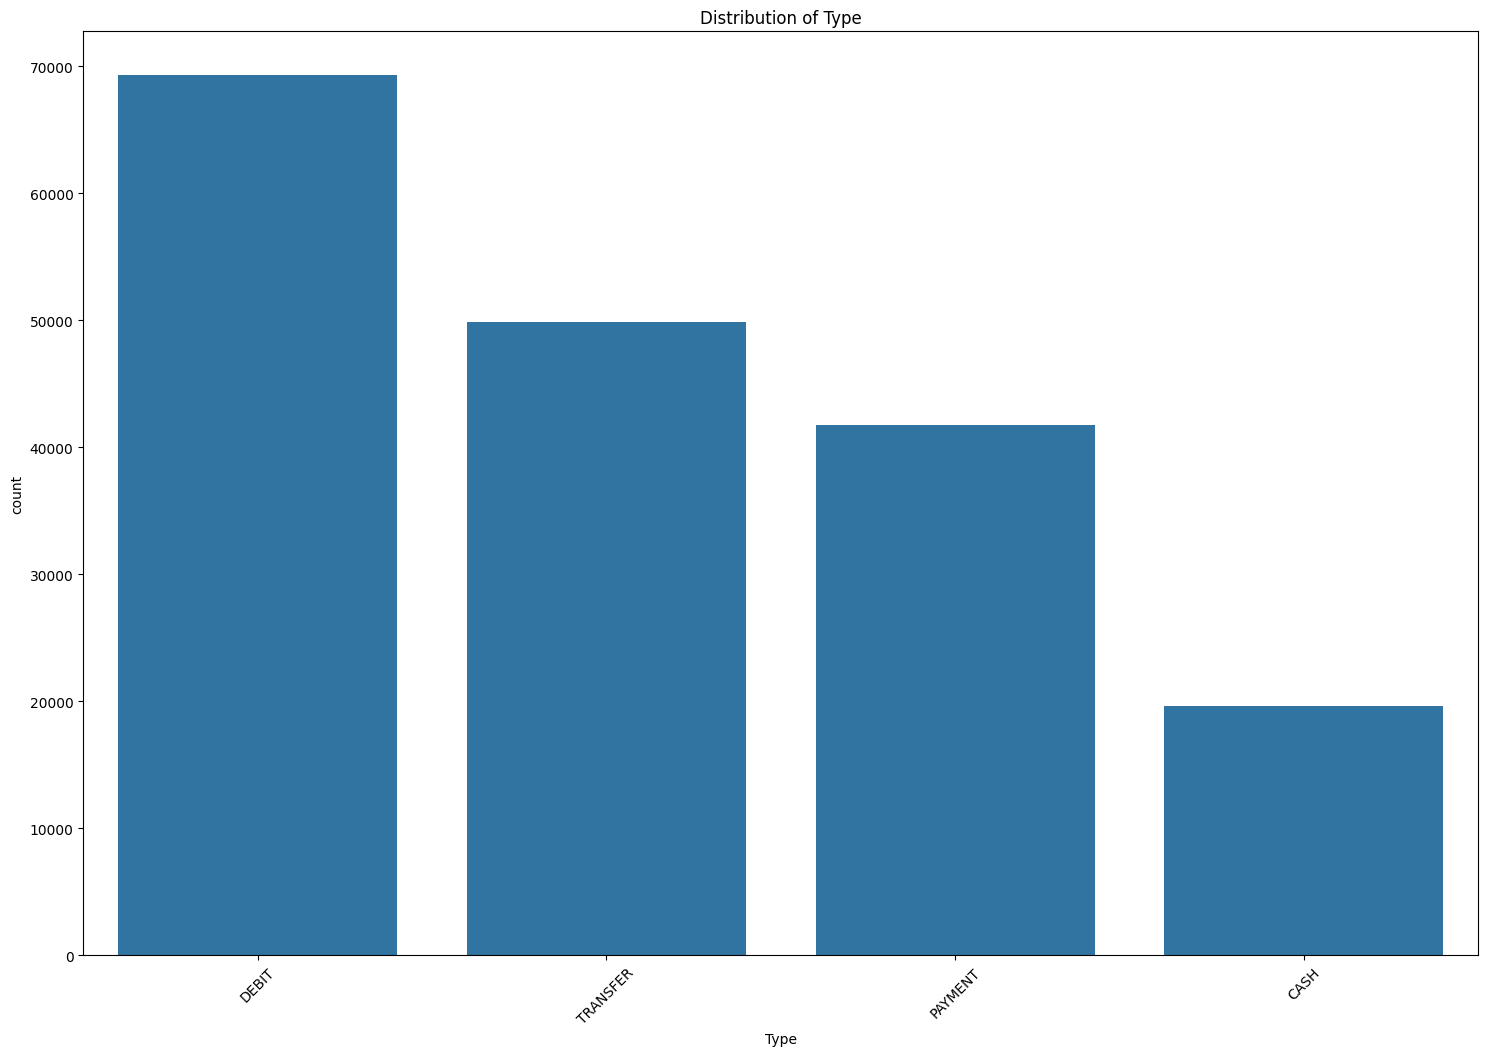

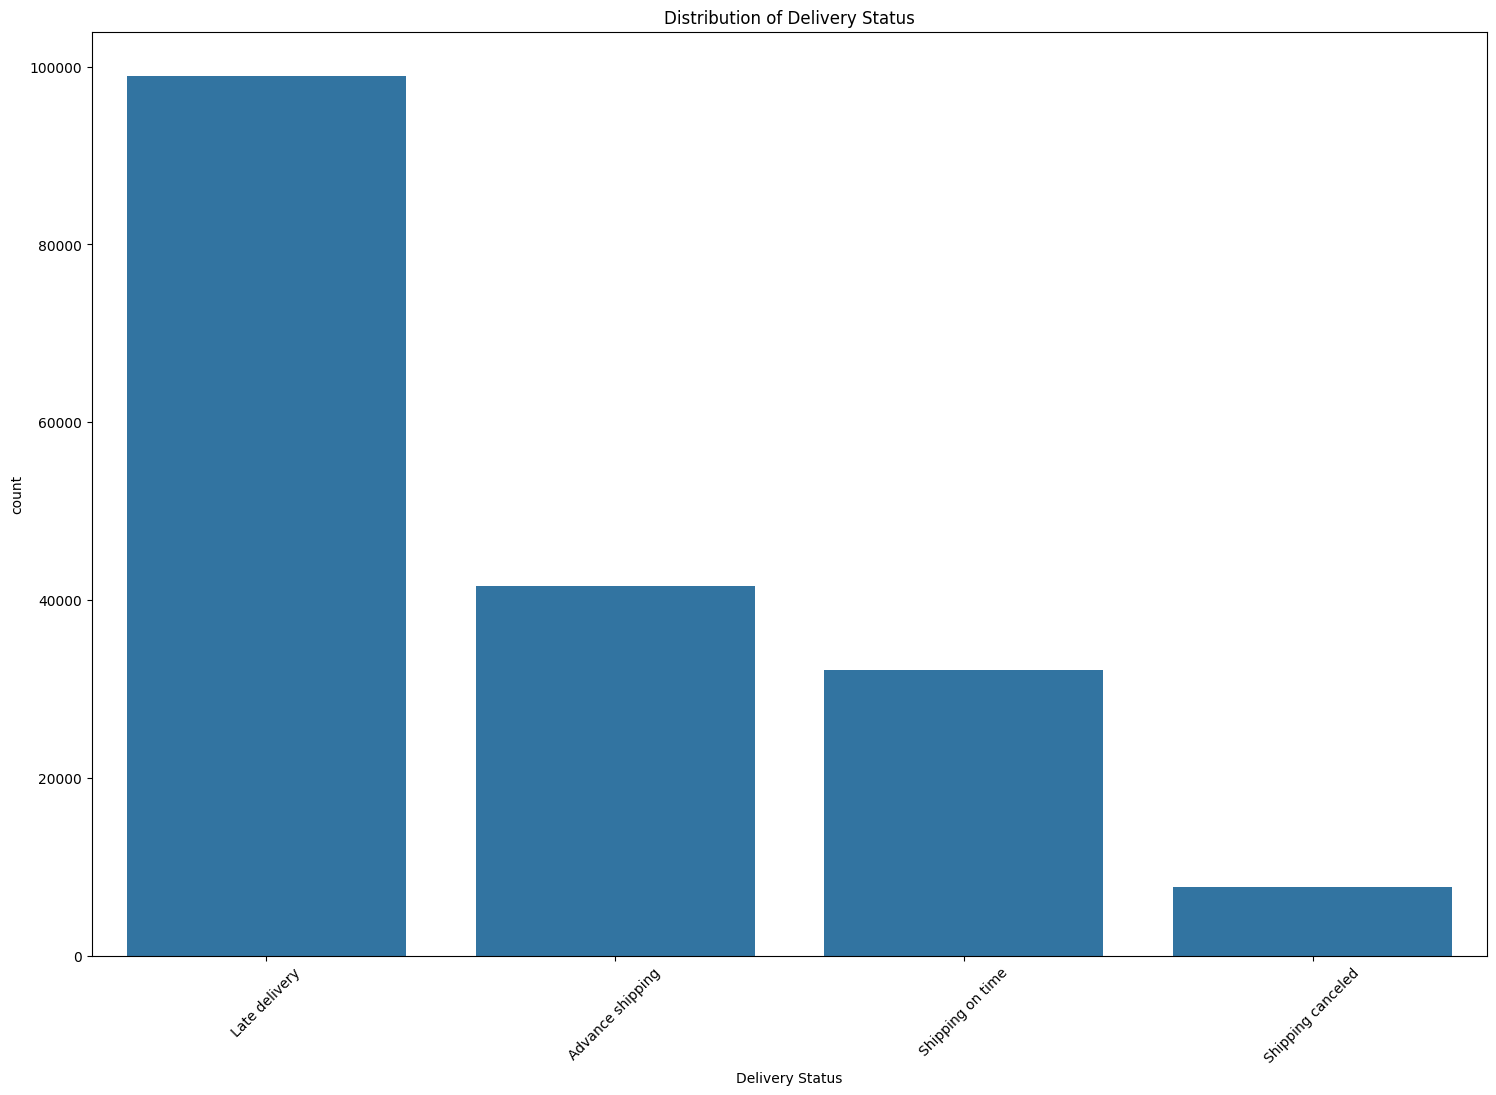

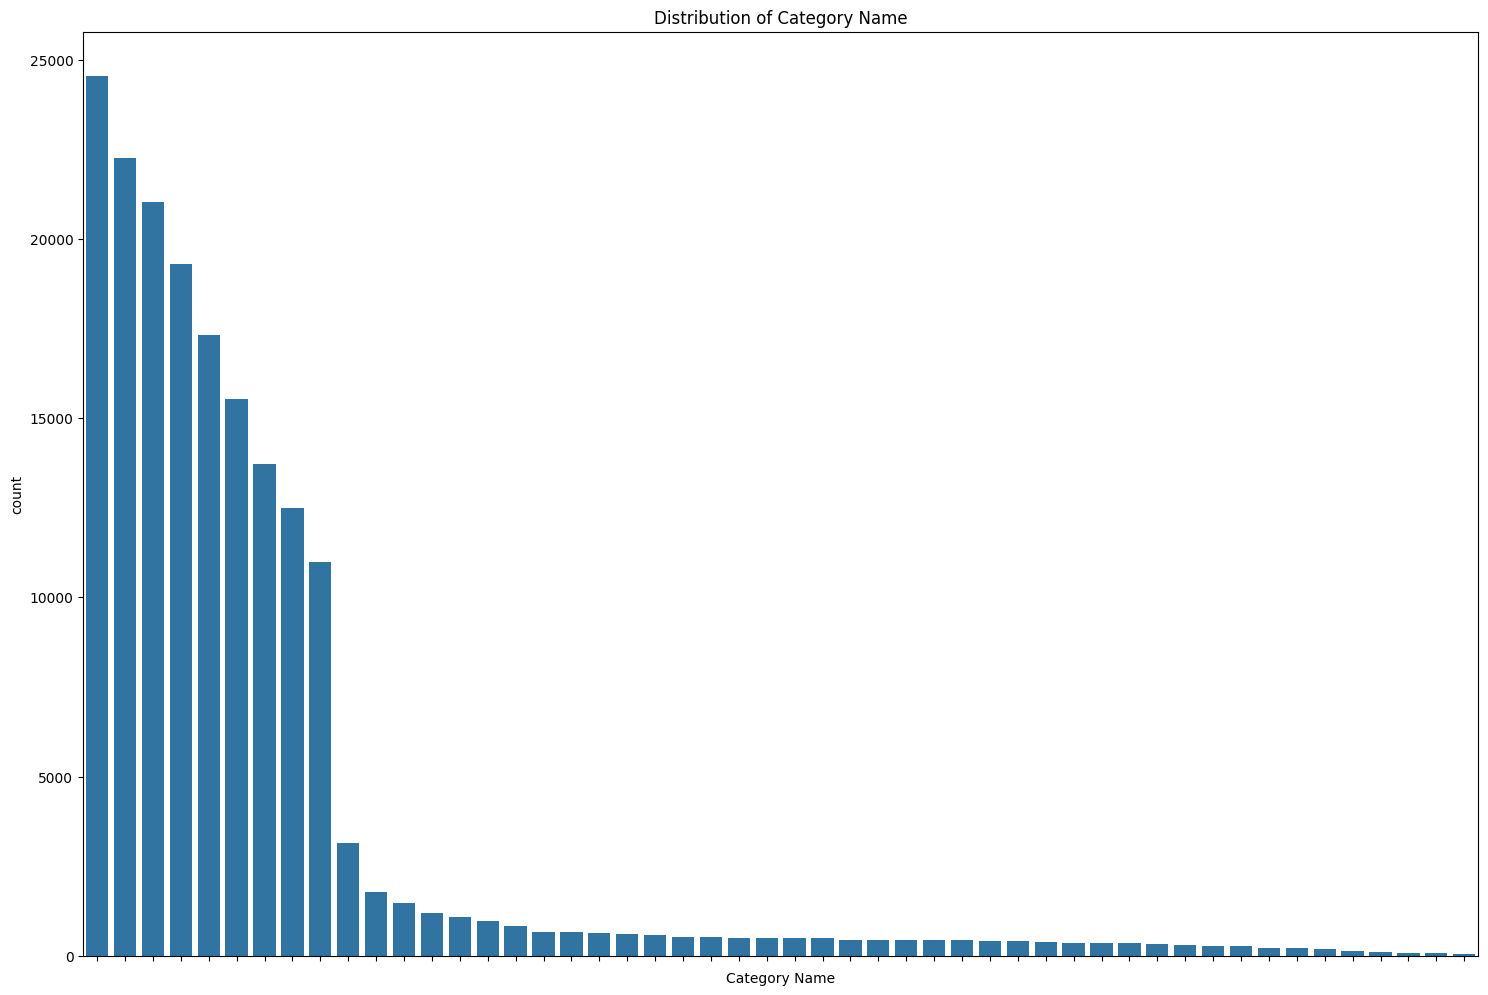

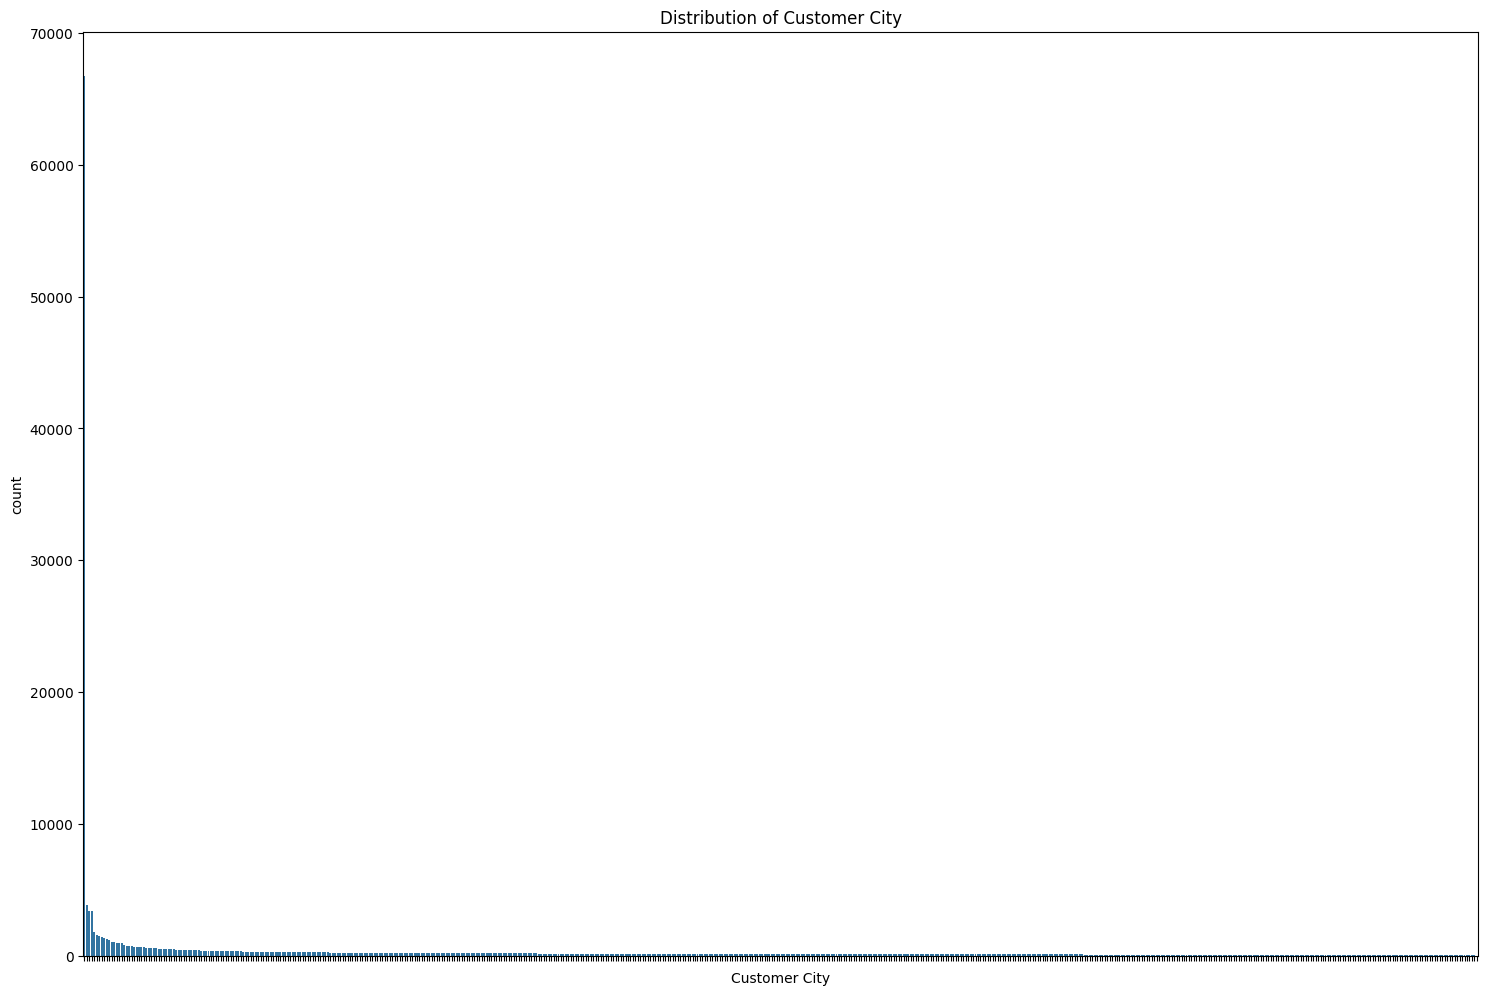

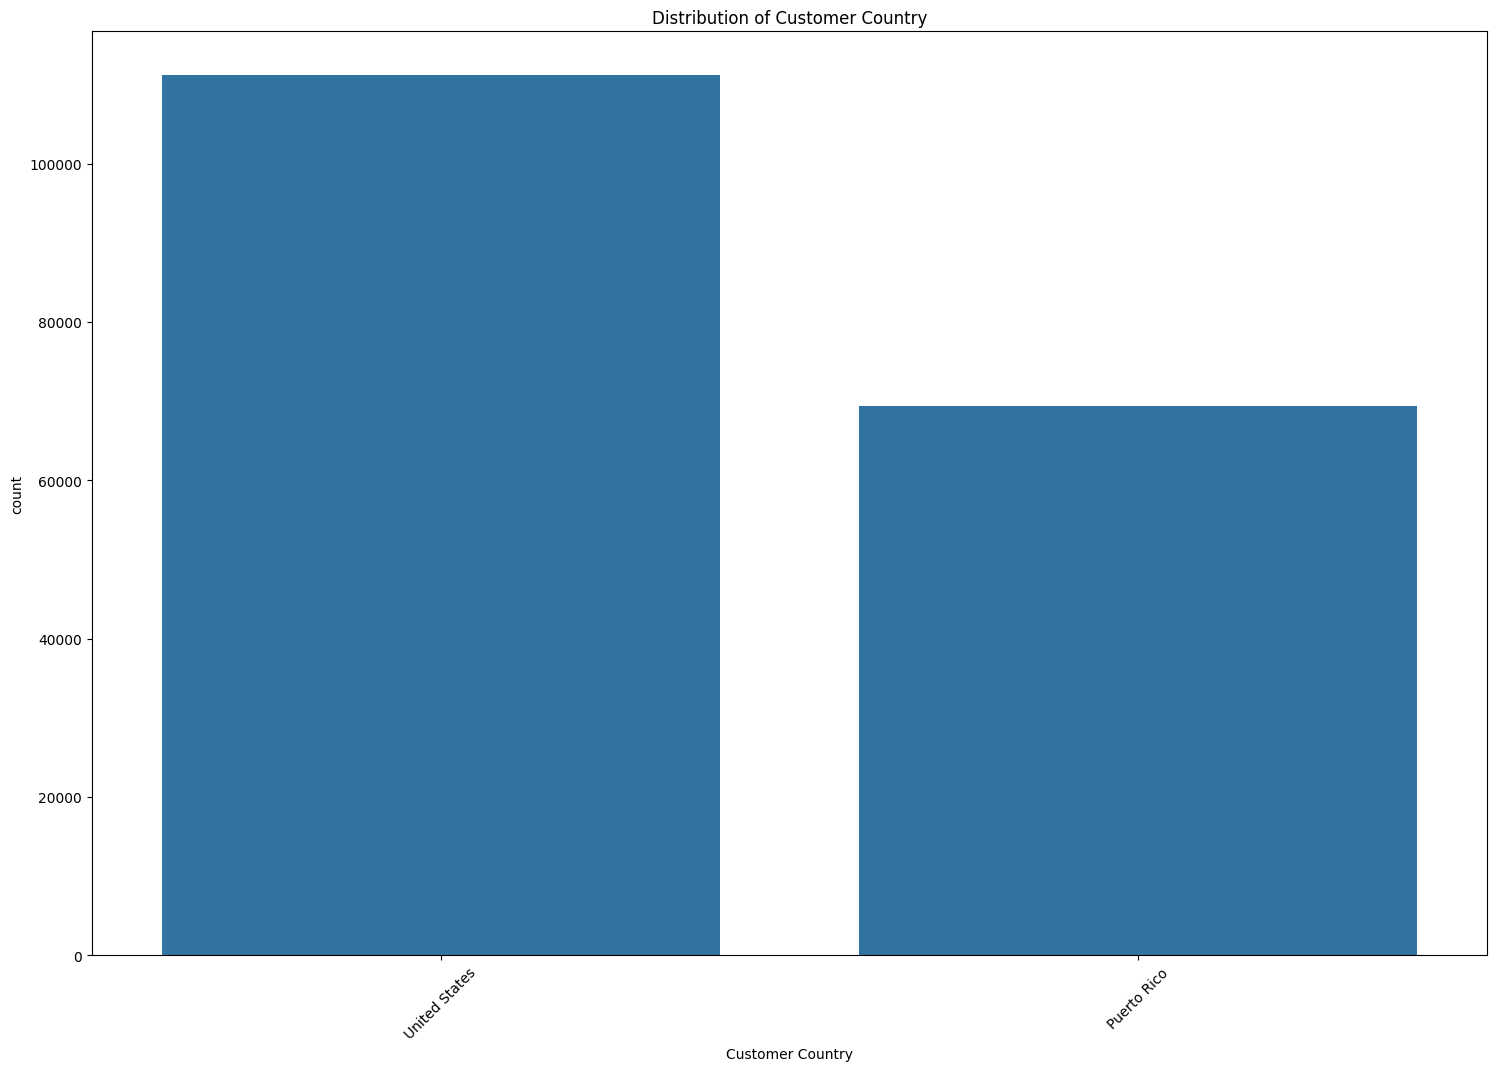

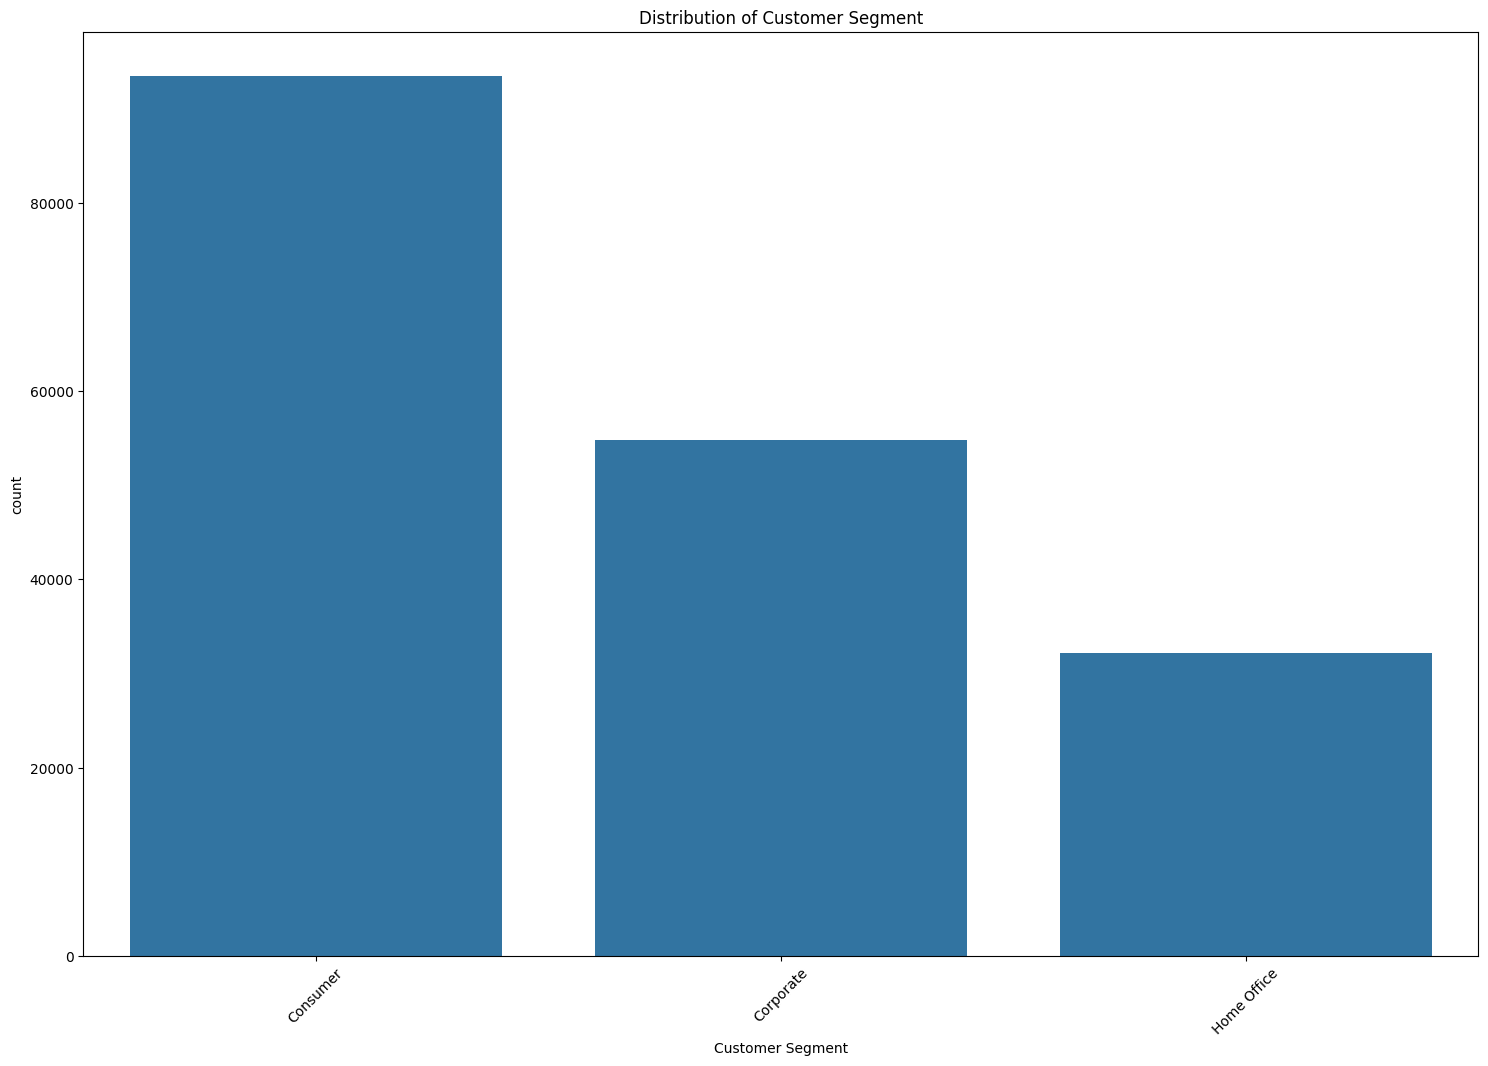

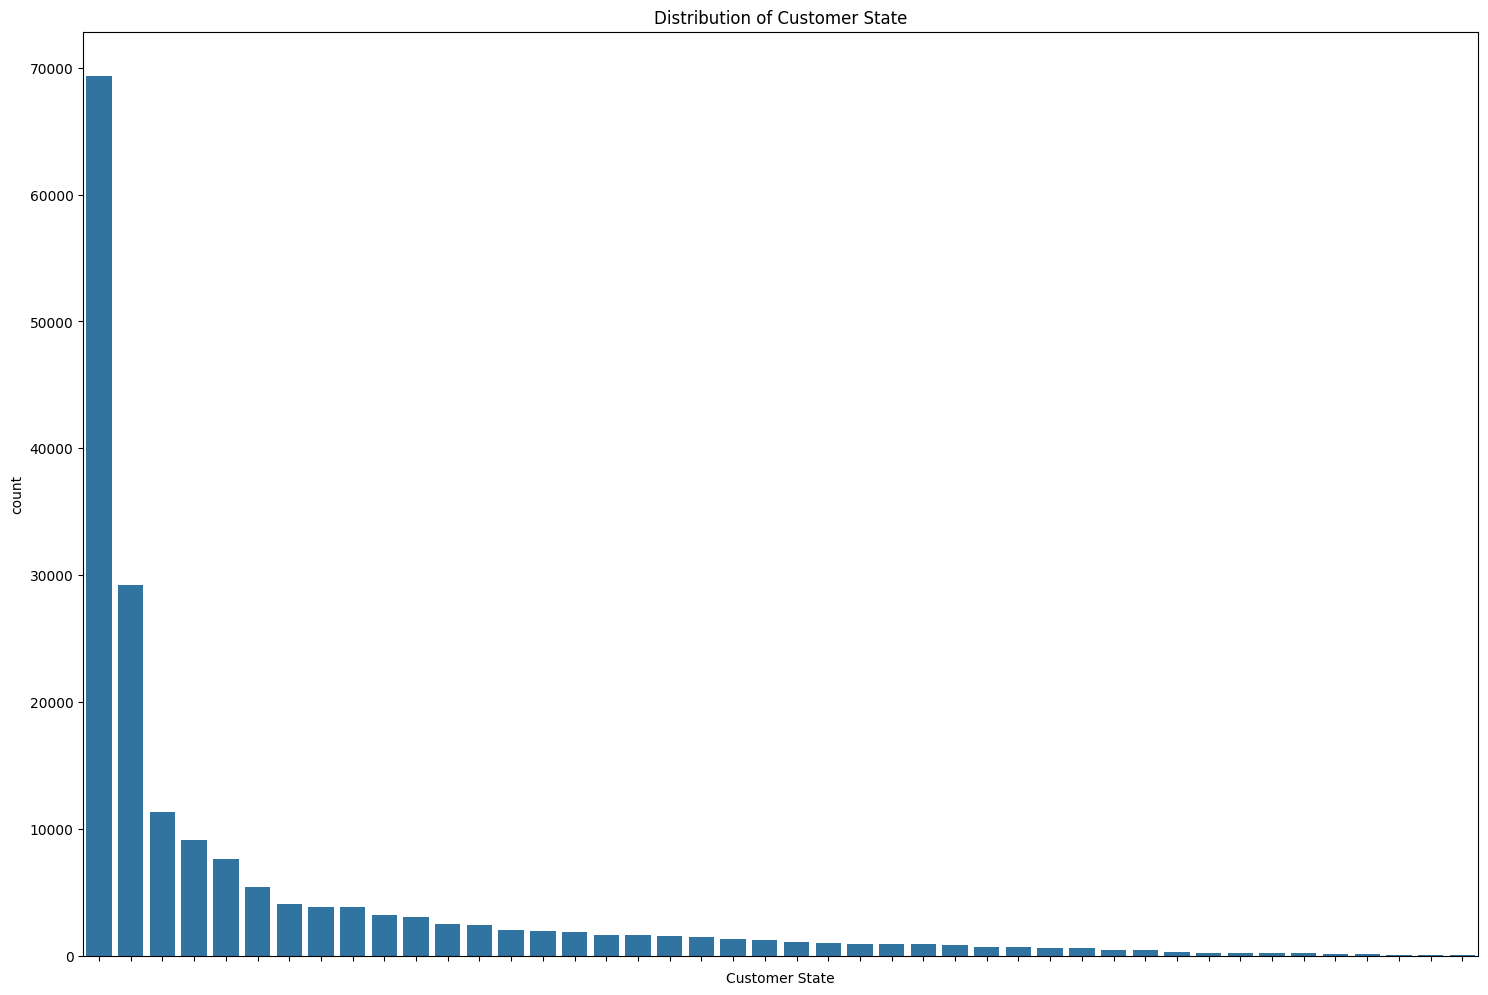

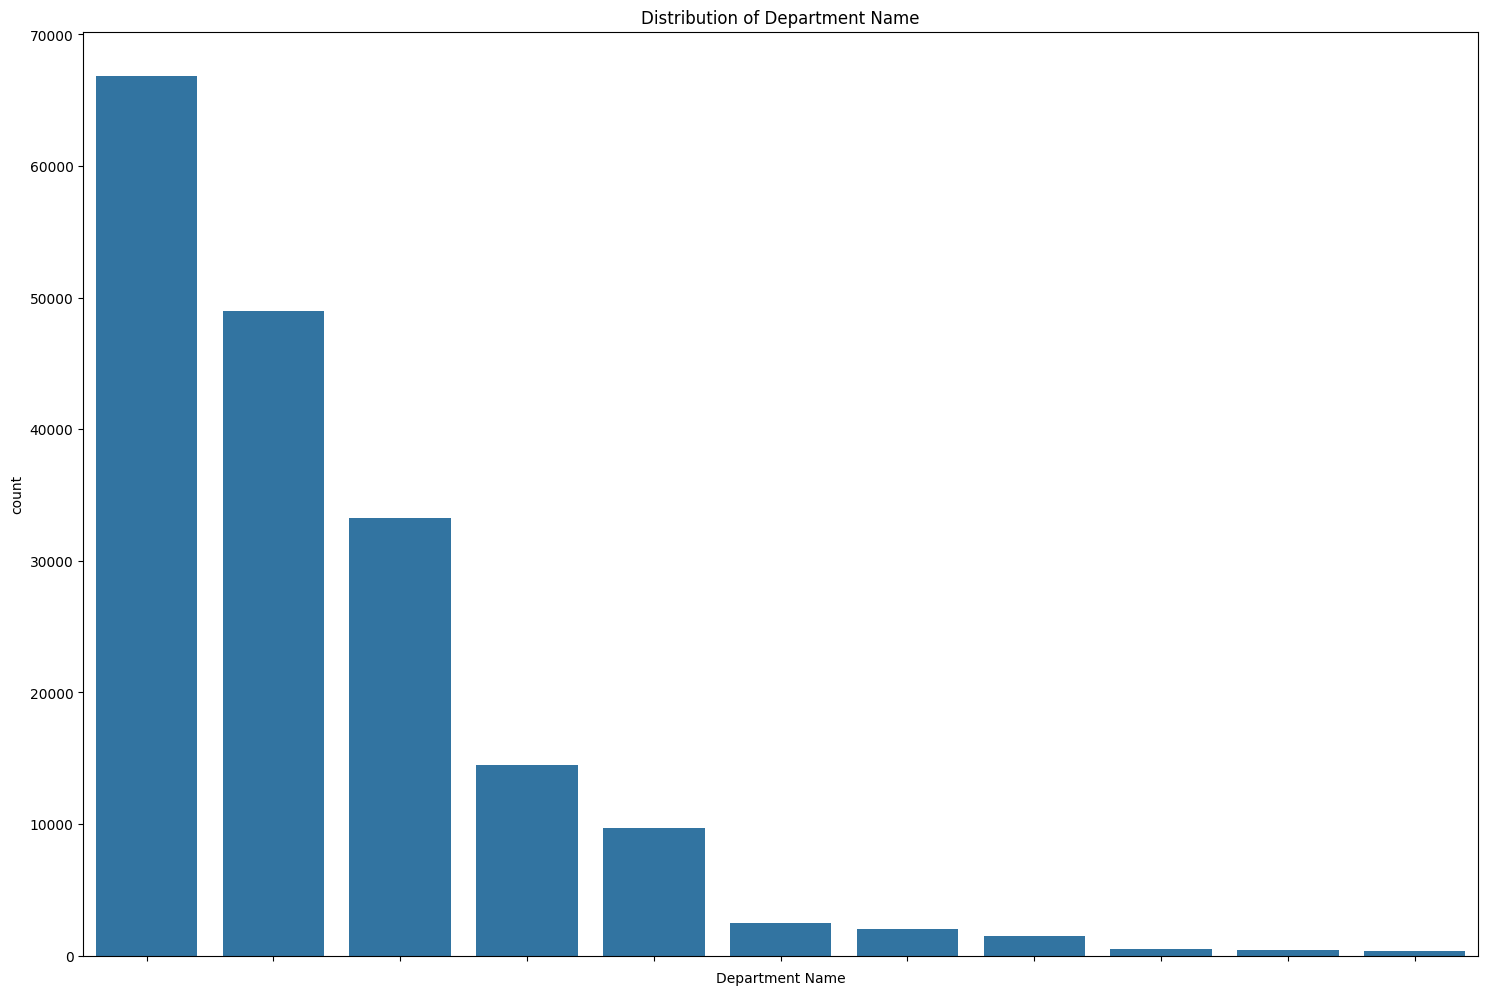

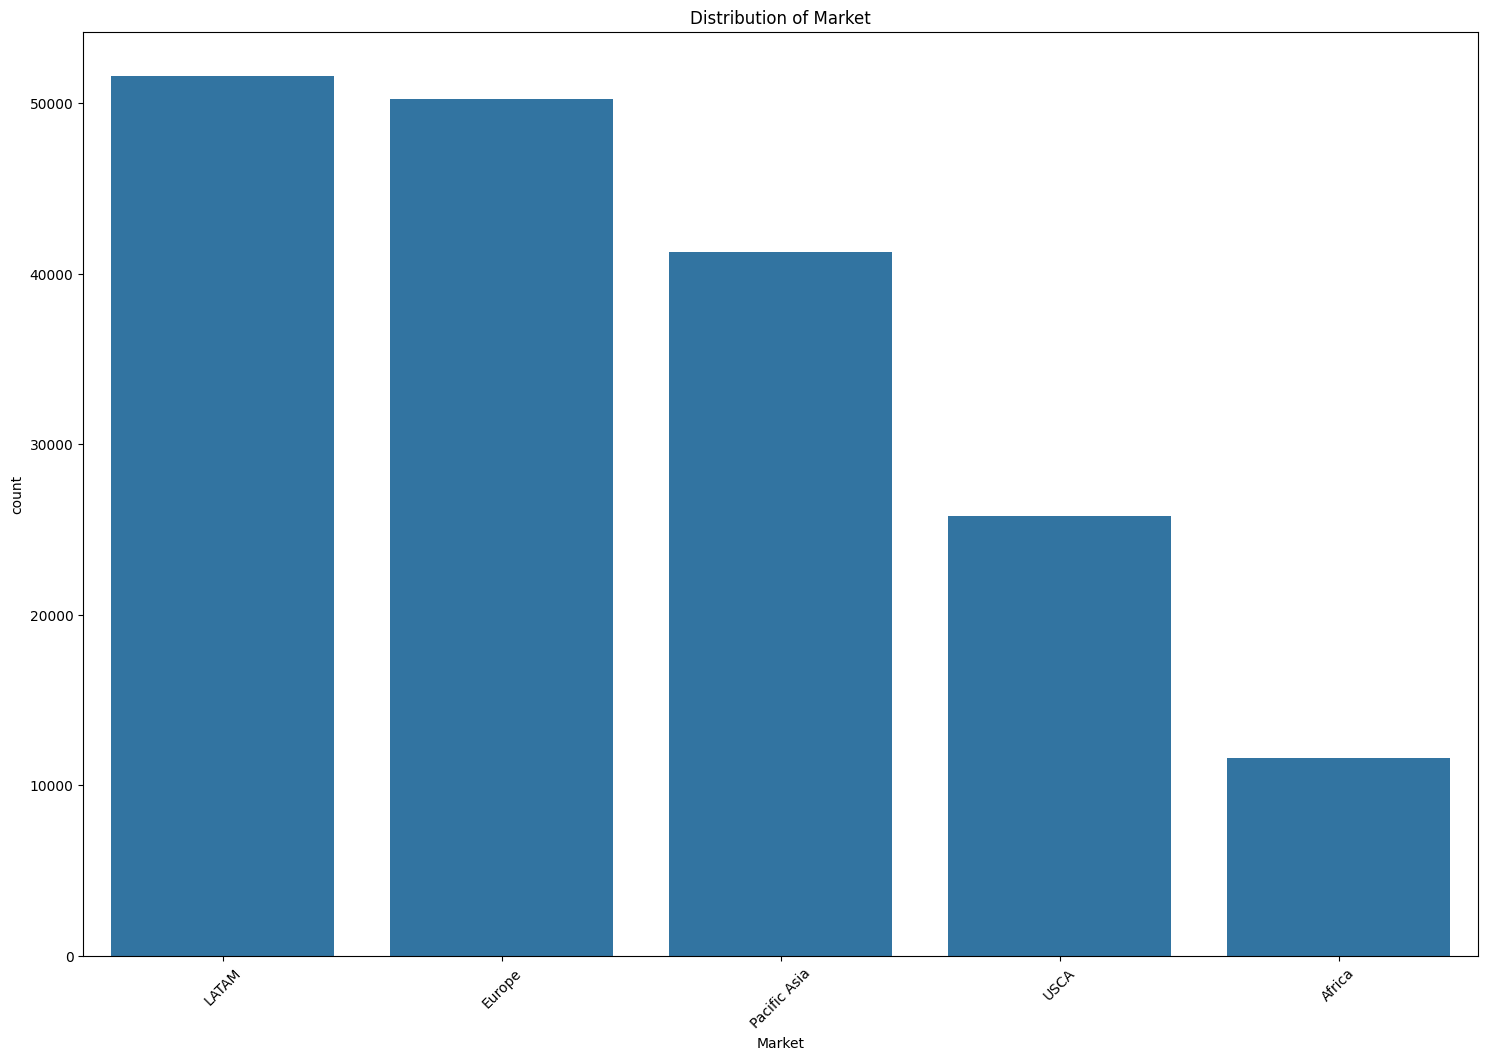

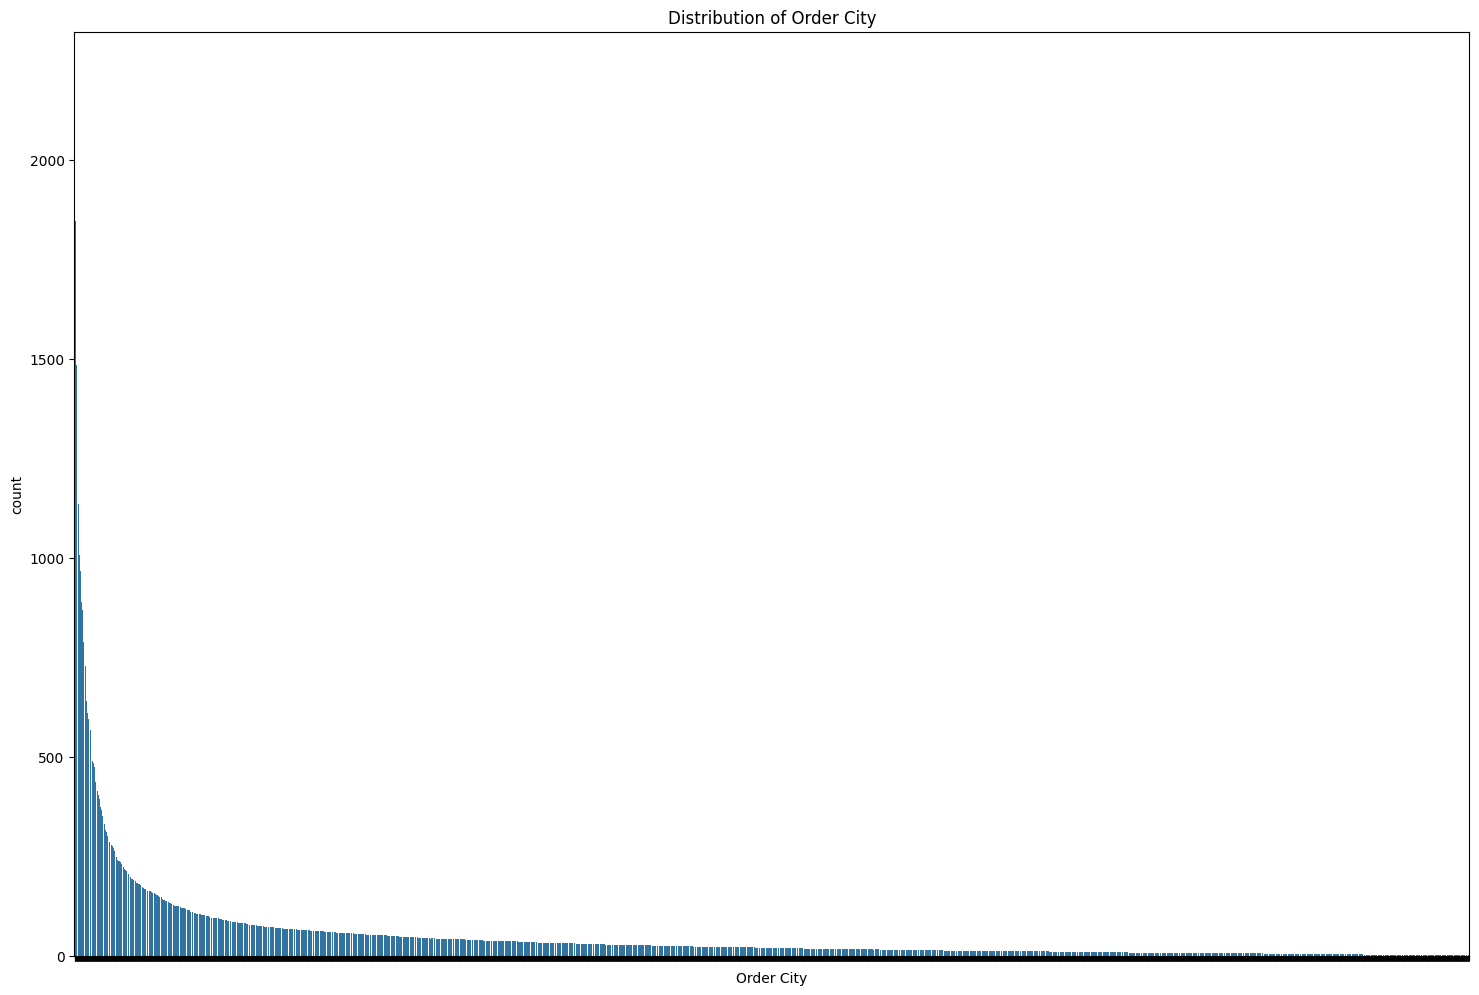

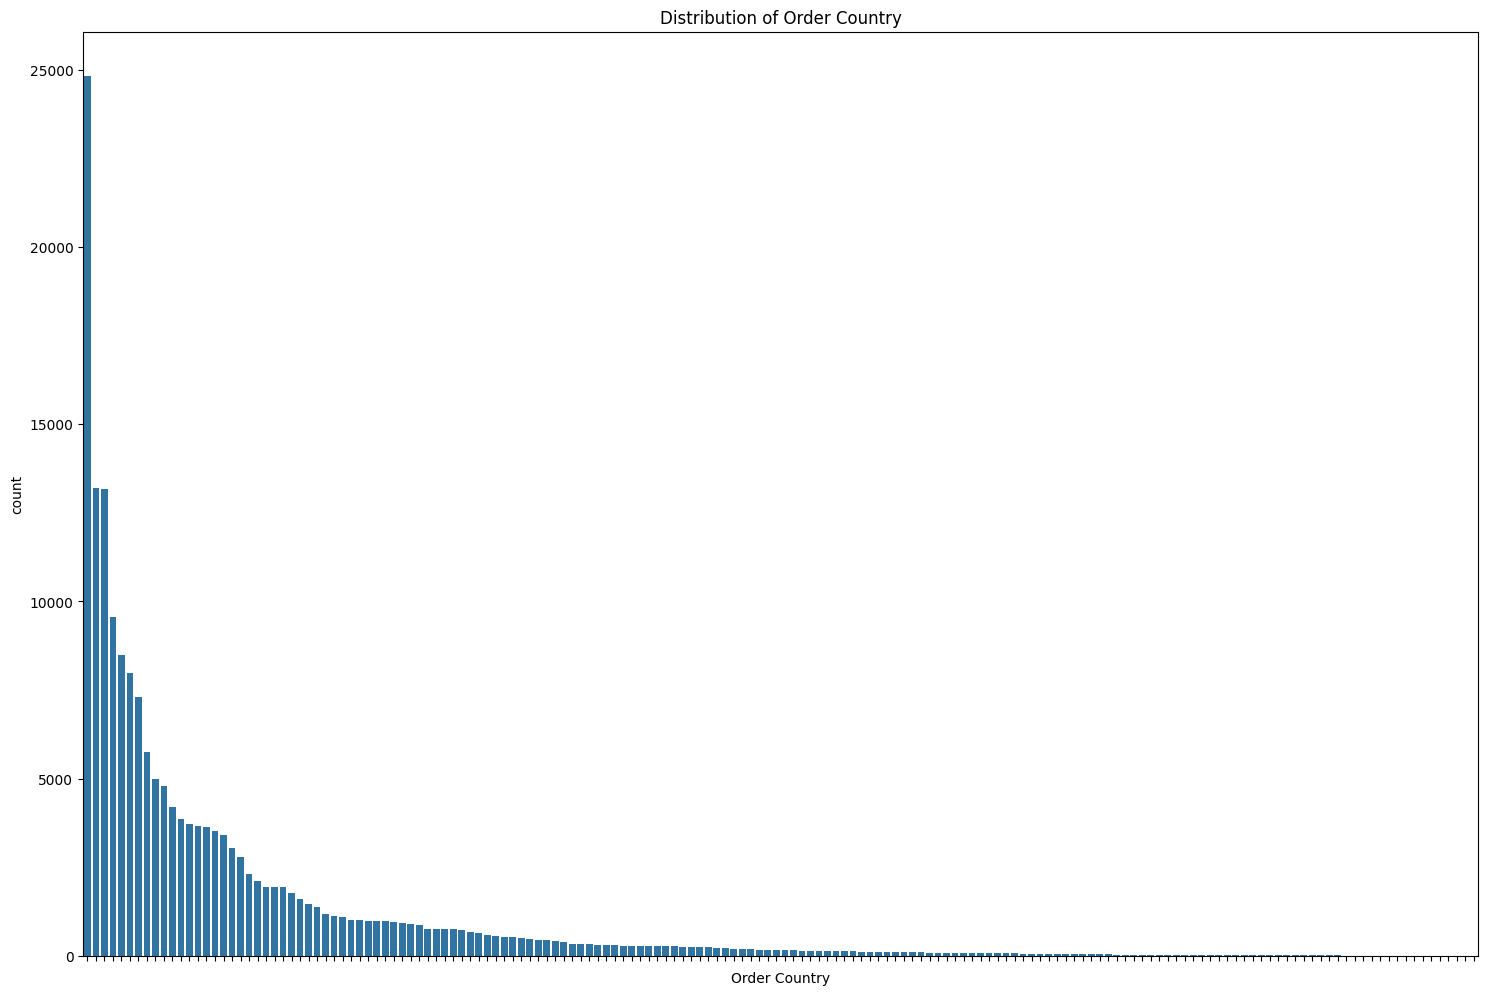

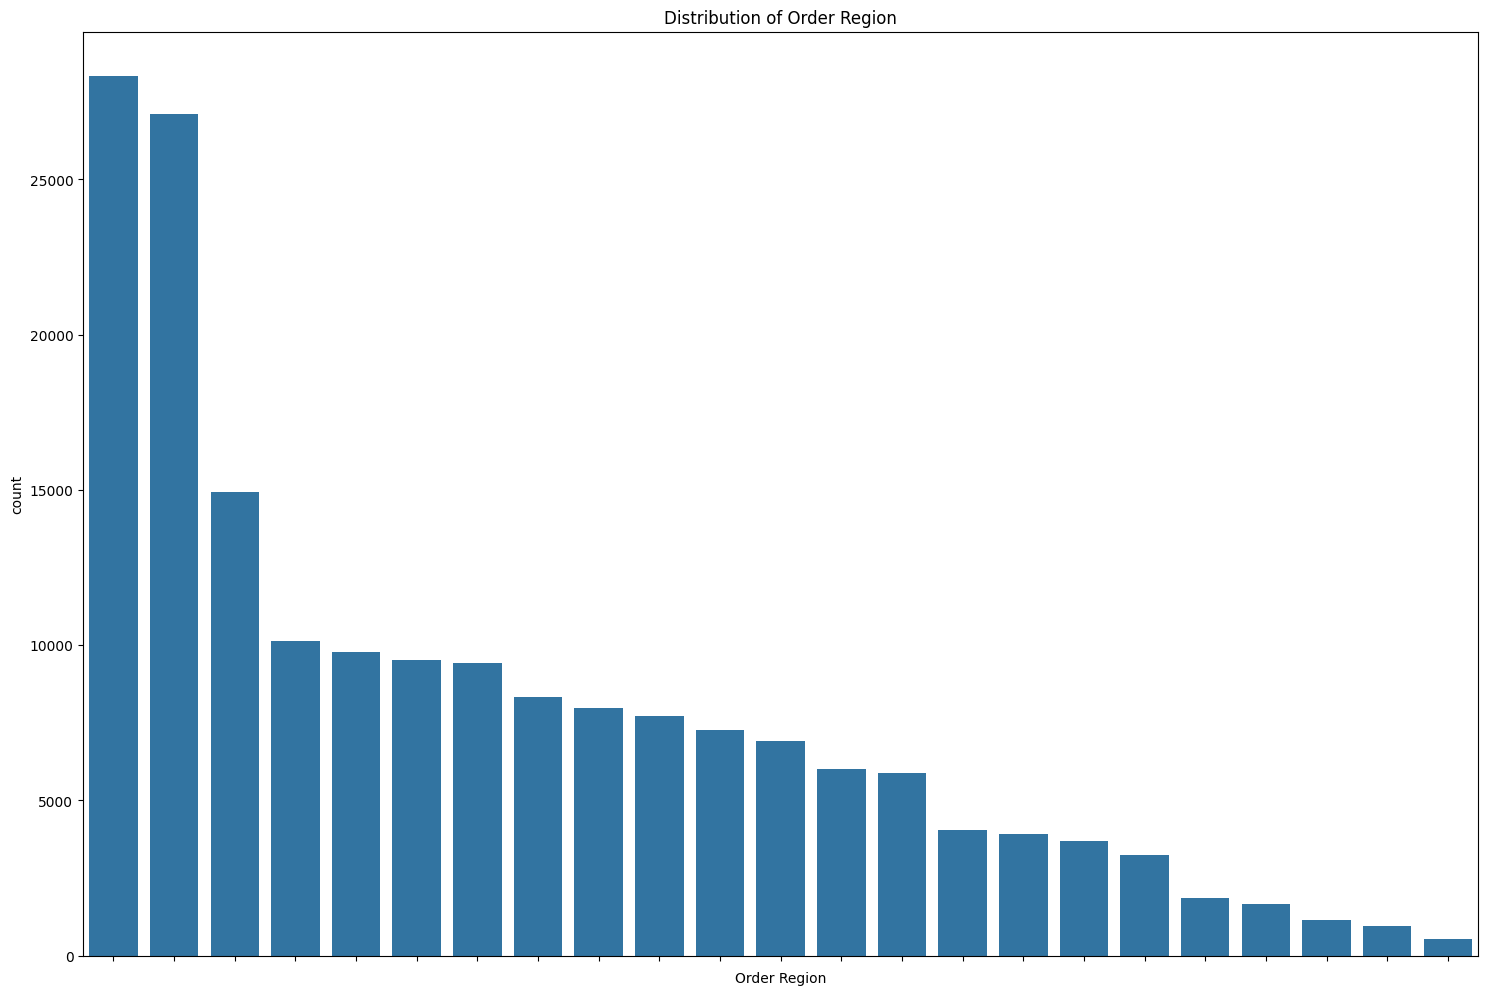

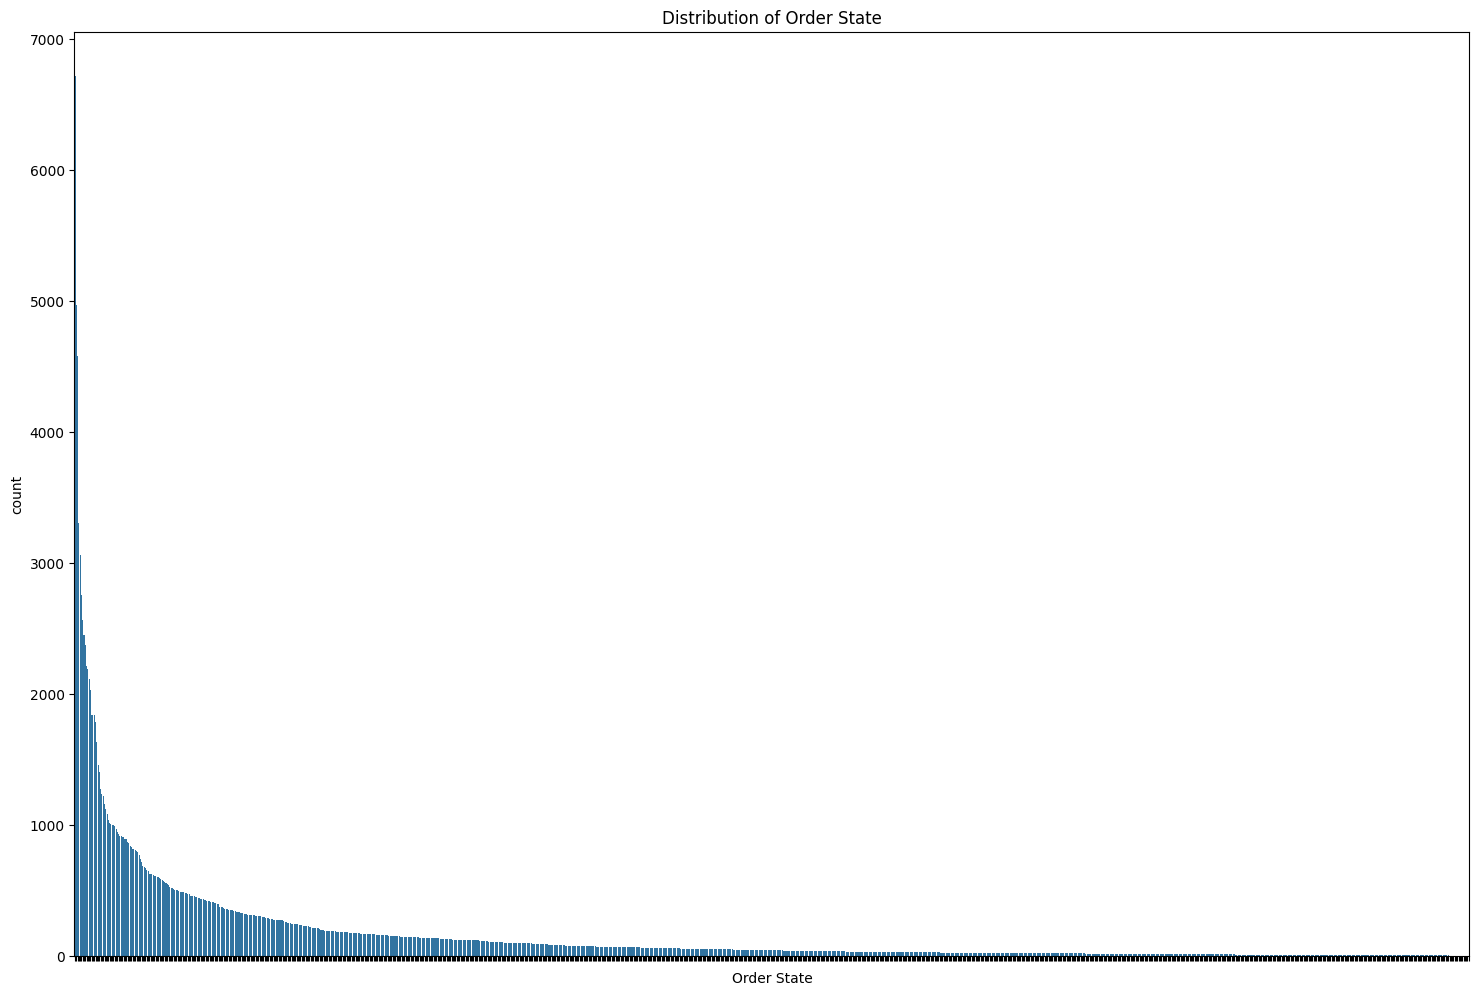

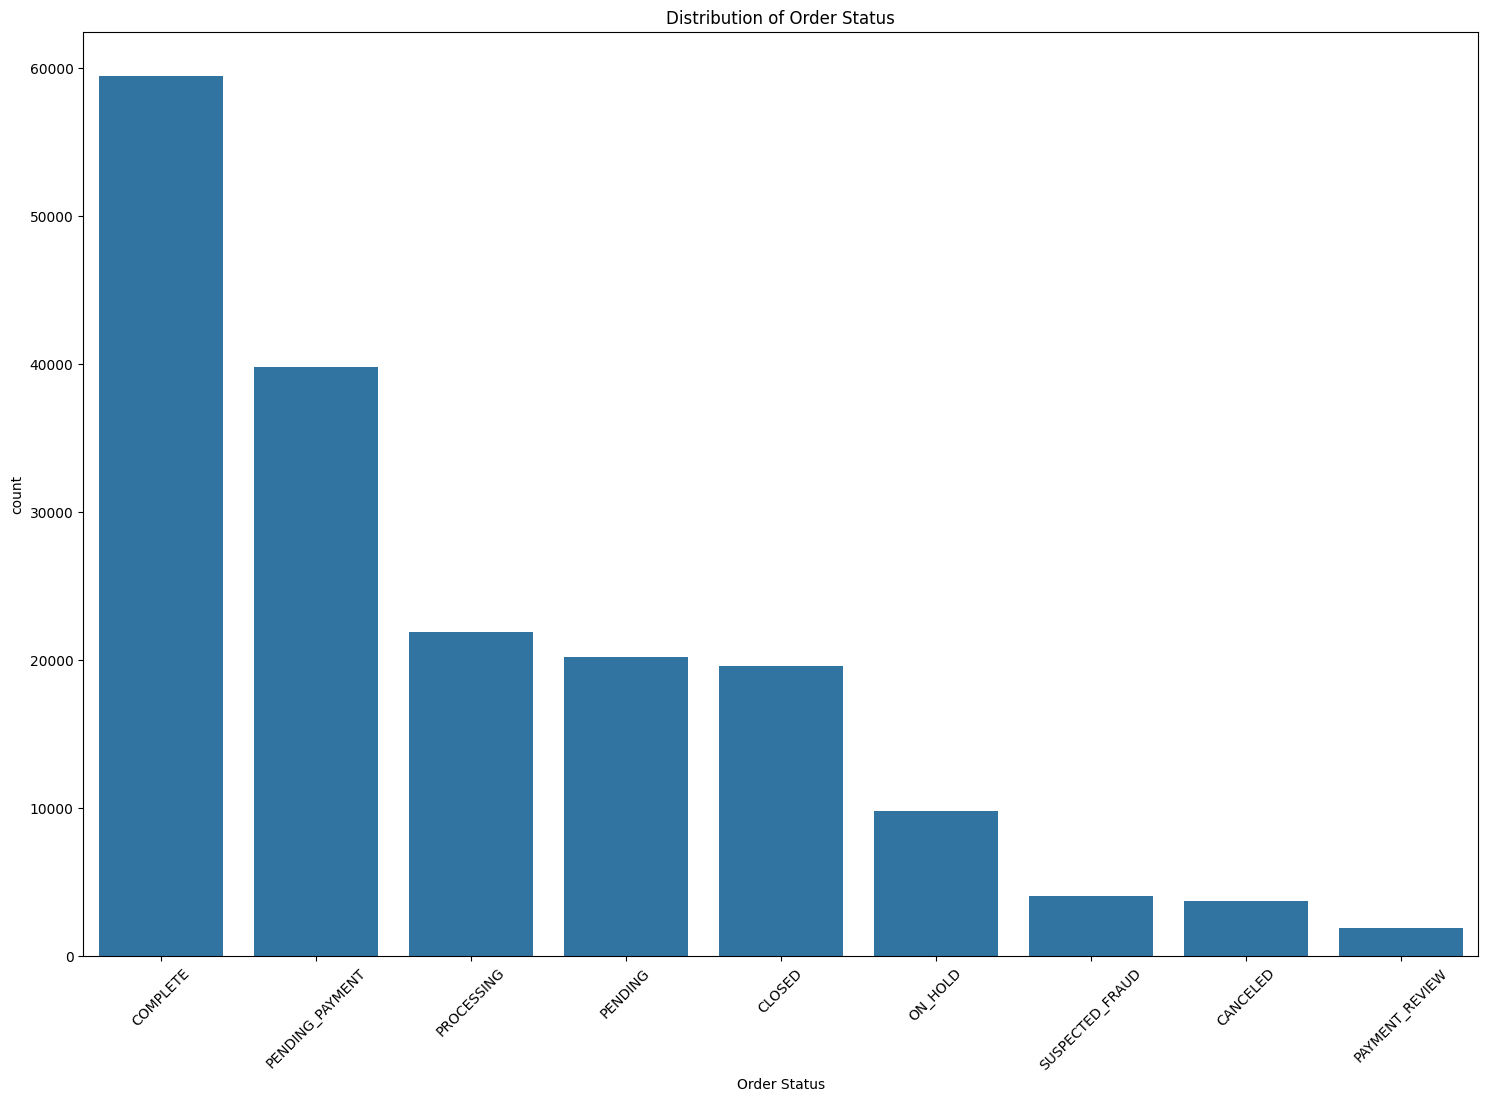

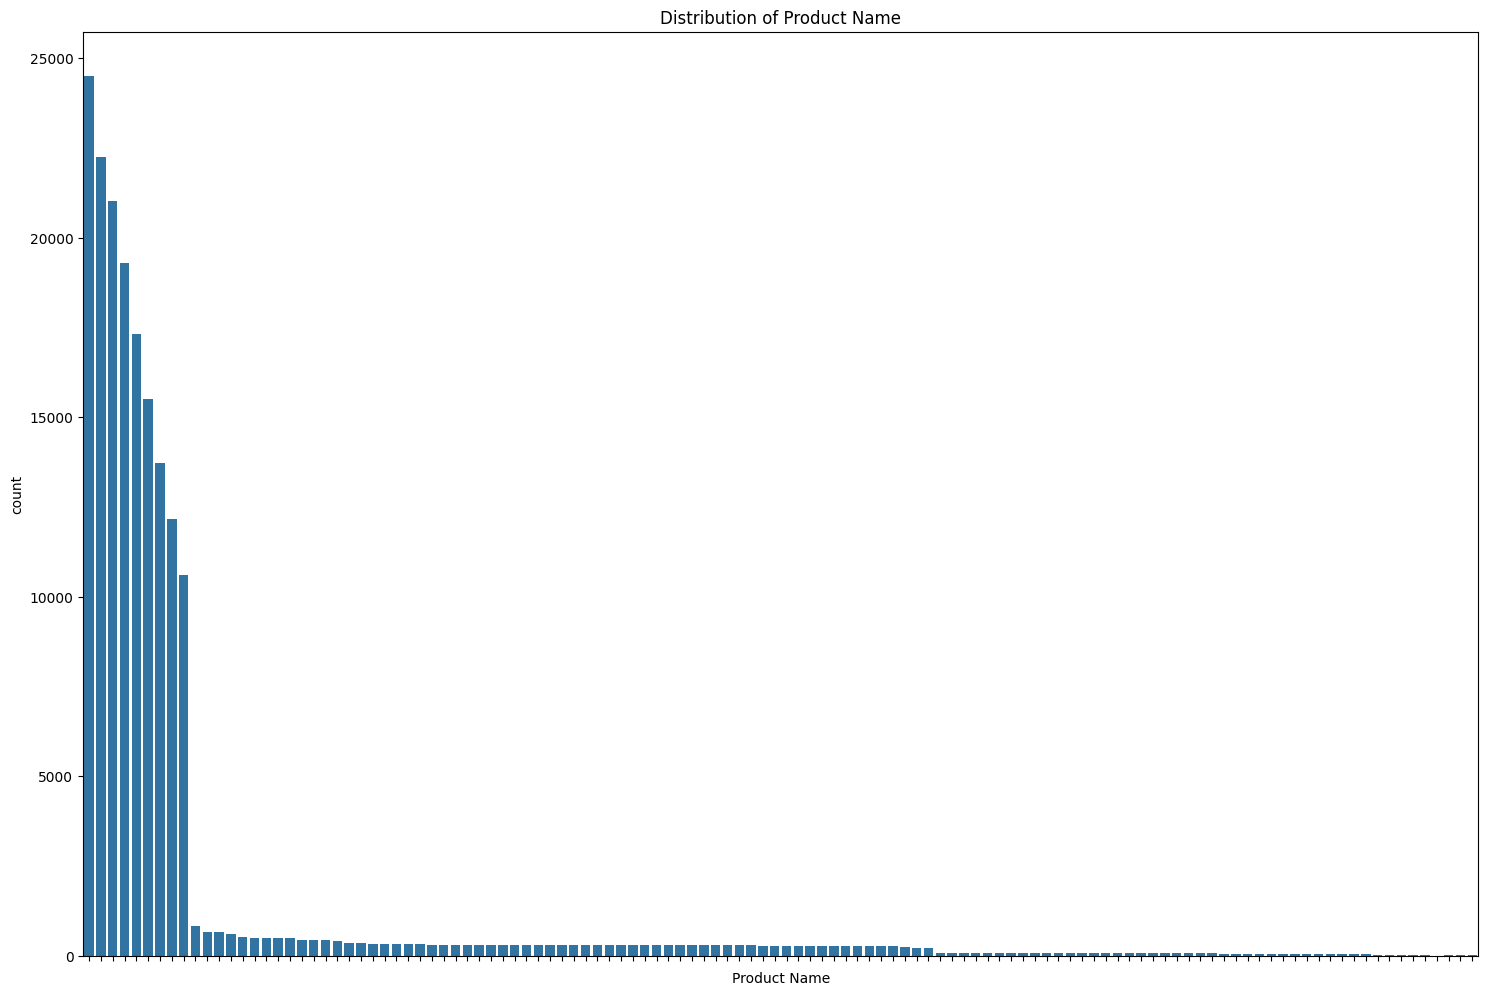

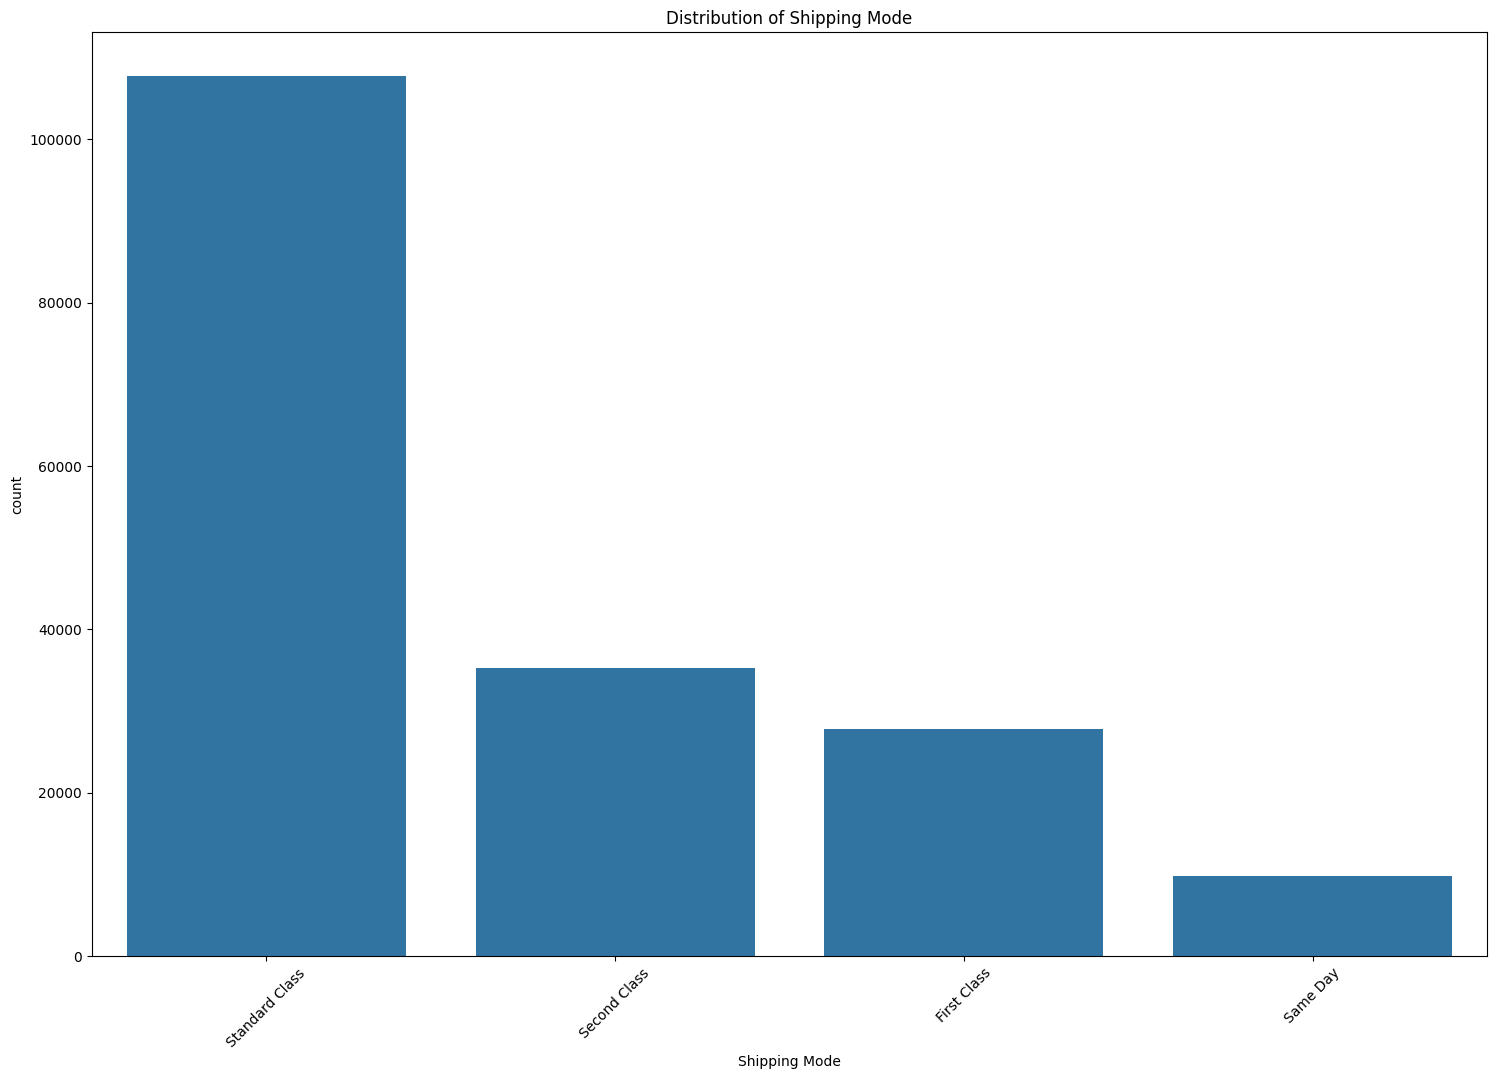

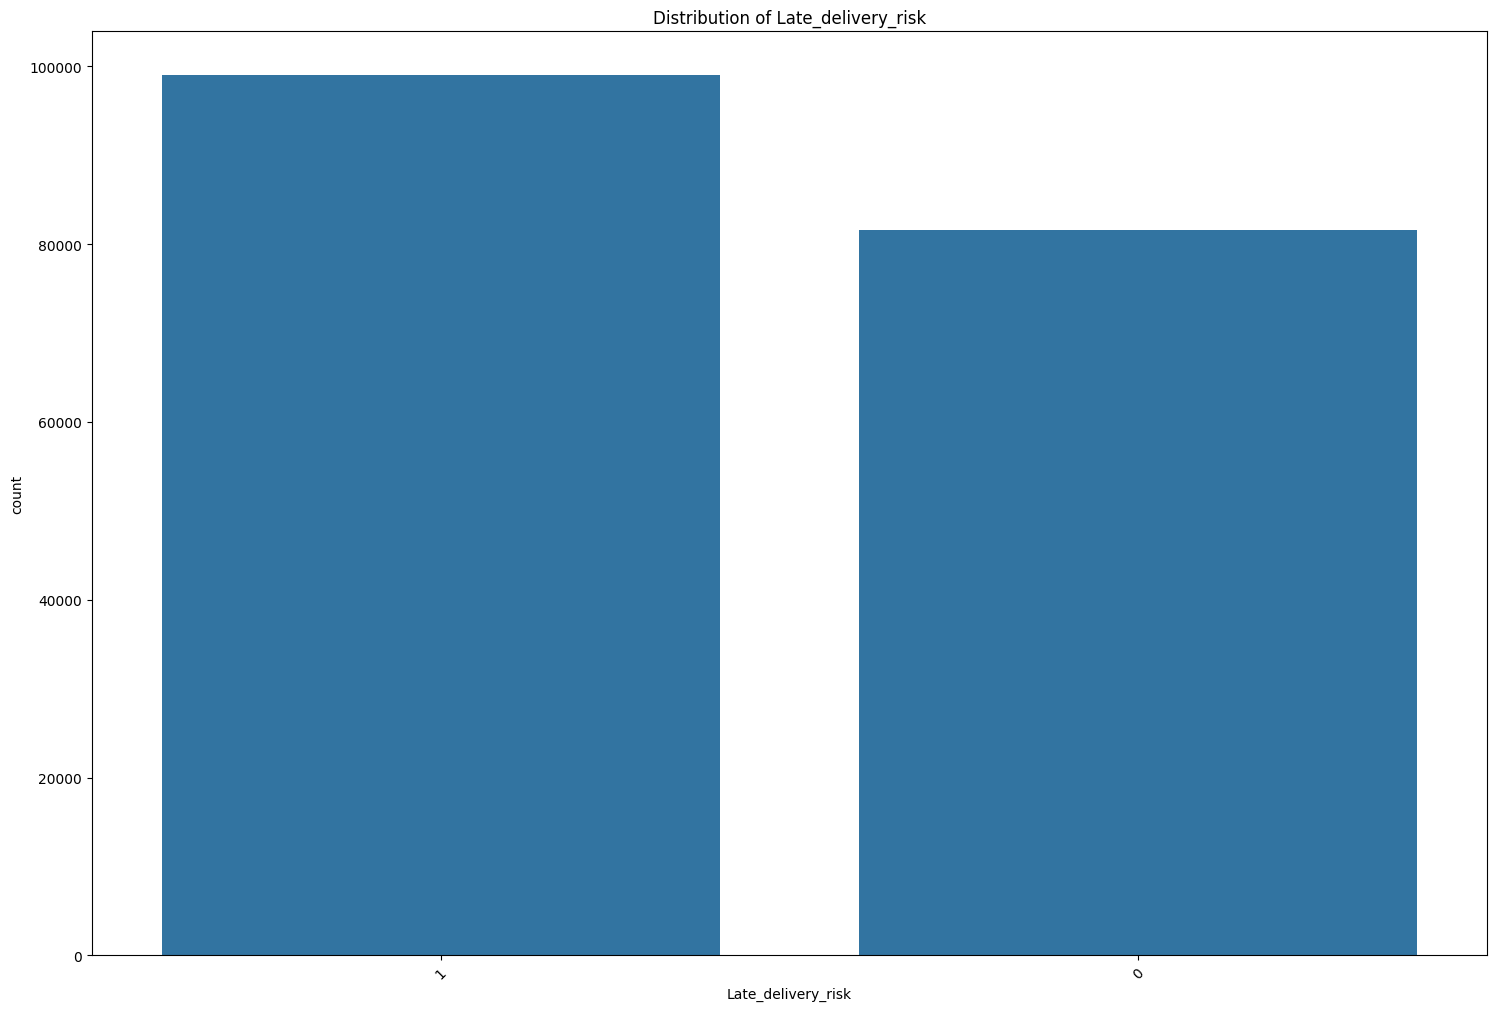

In [154]:
categorical_cols = cate_col.columns
for col in categorical_cols:
    plt.figure(figsize=(18, 12))
    ax = sns.countplot(x=df1_filtered[col], order=data[col].value_counts().index)
    if len(df1_filtered[col].unique()) > 10:
      ax.set_xticklabels([])
    else :
      plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()

### Other Insights

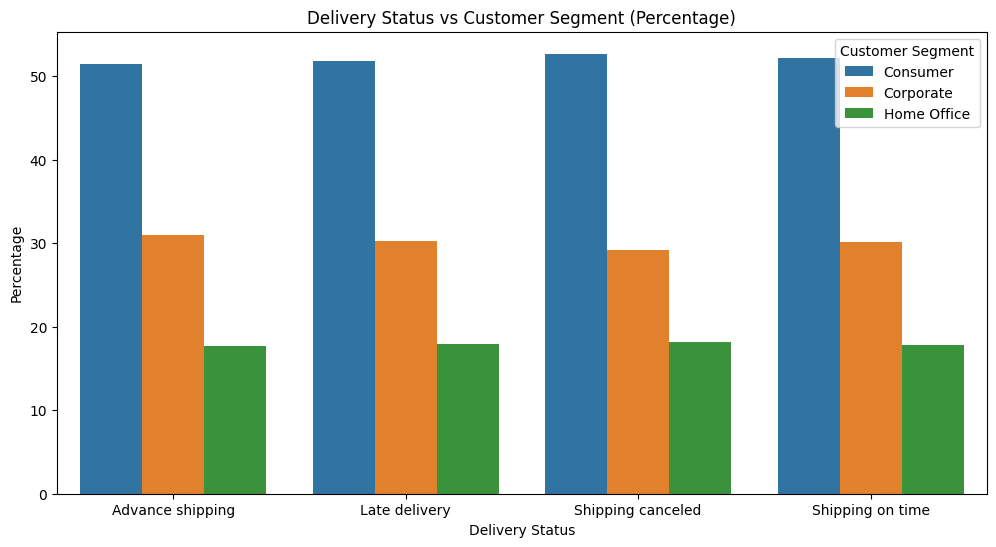

In [155]:
# Alternative visualization (countplot) with percentage
plt.figure(figsize=(12, 6))

# Compute percentages
df1_percentage = df1_filtered.groupby('Delivery Status')['Customer Segment'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')

# Plot as a bar chart
sns.barplot(x='Delivery Status', y='Percentage', hue='Customer Segment', data=df1_percentage)

plt.title('Delivery Status vs Customer Segment (Percentage)')
plt.ylabel('Percentage')
plt.show()

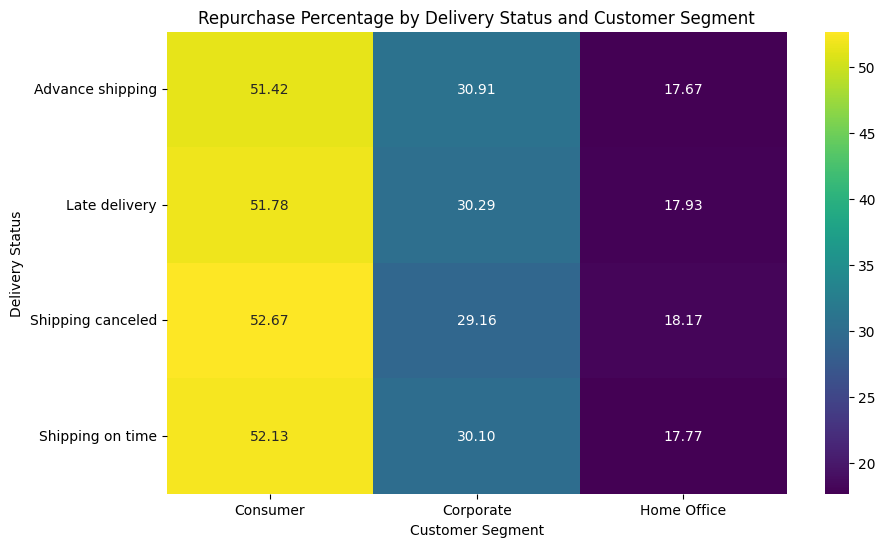

In [156]:
# Create a contingency table
contingency_table = pd.crosstab(df1_filtered['Delivery Status'], df1['Customer Segment'])

# Calculate the percentage of repurchase for each delivery status
repurchase_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.heatmap(repurchase_percentage, annot=True, fmt=".2f", cmap="viridis")
plt.title("Repurchase Percentage by Delivery Status and Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Delivery Status")
plt.show()

<ipython-input-157-559d4caa6dae>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-157-559d4caa6dae>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Correlation between Order Item Discount Rate  and Repurchase: -0.0004910204924783489


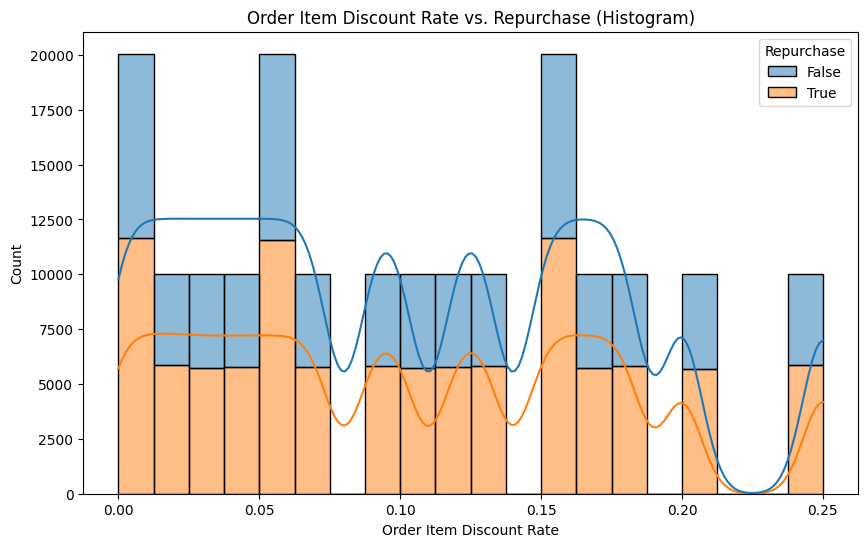

In [157]:
# Create a new column 'Repurchase' Definition: Order ID appears more than 6 times each year
df1_filtered['Year'] = pd.to_datetime(df1_filtered['shipping date (DateOrders)']).dt.year
df1_filtered['Repurchase'] = df1_filtered.groupby(['Customer Id', 'Year'])['Order Id'].transform('count') > 6

# Calculate the correlation between discount rate and repurchase rate
correlation = df1_filtered['Order Item Discount Rate'].corr(df1_filtered['Repurchase'])
print(f"Correlation between Order Item Discount Rate  and Repurchase: {correlation}")

# Visualization (Histogram)
plt.figure(figsize=(10, 6))

# Plot histogram with bin size of 0.05
sns.histplot(df1_filtered, x='Order Item Discount Rate', hue='Repurchase', bins=int(1/0.05), kde=True, multiple="stack")

plt.title('Order Item Discount Rate vs. Repurchase (Histogram)')
plt.xlabel('Order Item Discount Rate')
plt.ylabel('Count')
plt.show()

In [158]:
#Need further check in this discrepency
import plotly.express as px
fig = px.scatter_geo(df1_filtered, lat = "Latitude", lon="Longitude", color="Customer State",  scope="usa")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [159]:
df1_filtered['Order Hour'] = df1_filtered['order date (DateOrders)'].dt.hour
df1_filtered['Order Day'] = df1_filtered['order date (DateOrders)'].dt.day_name()
df1_filtered['Order Month'] = df1_filtered['order date (DateOrders)'].dt.month_name()
df1_filtered['Order Year'] = df1_filtered['order date (DateOrders)'].dt.year

<ipython-input-159-3fe77296a963>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-3fe77296a963>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-3fe77296a963>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-159-3fe

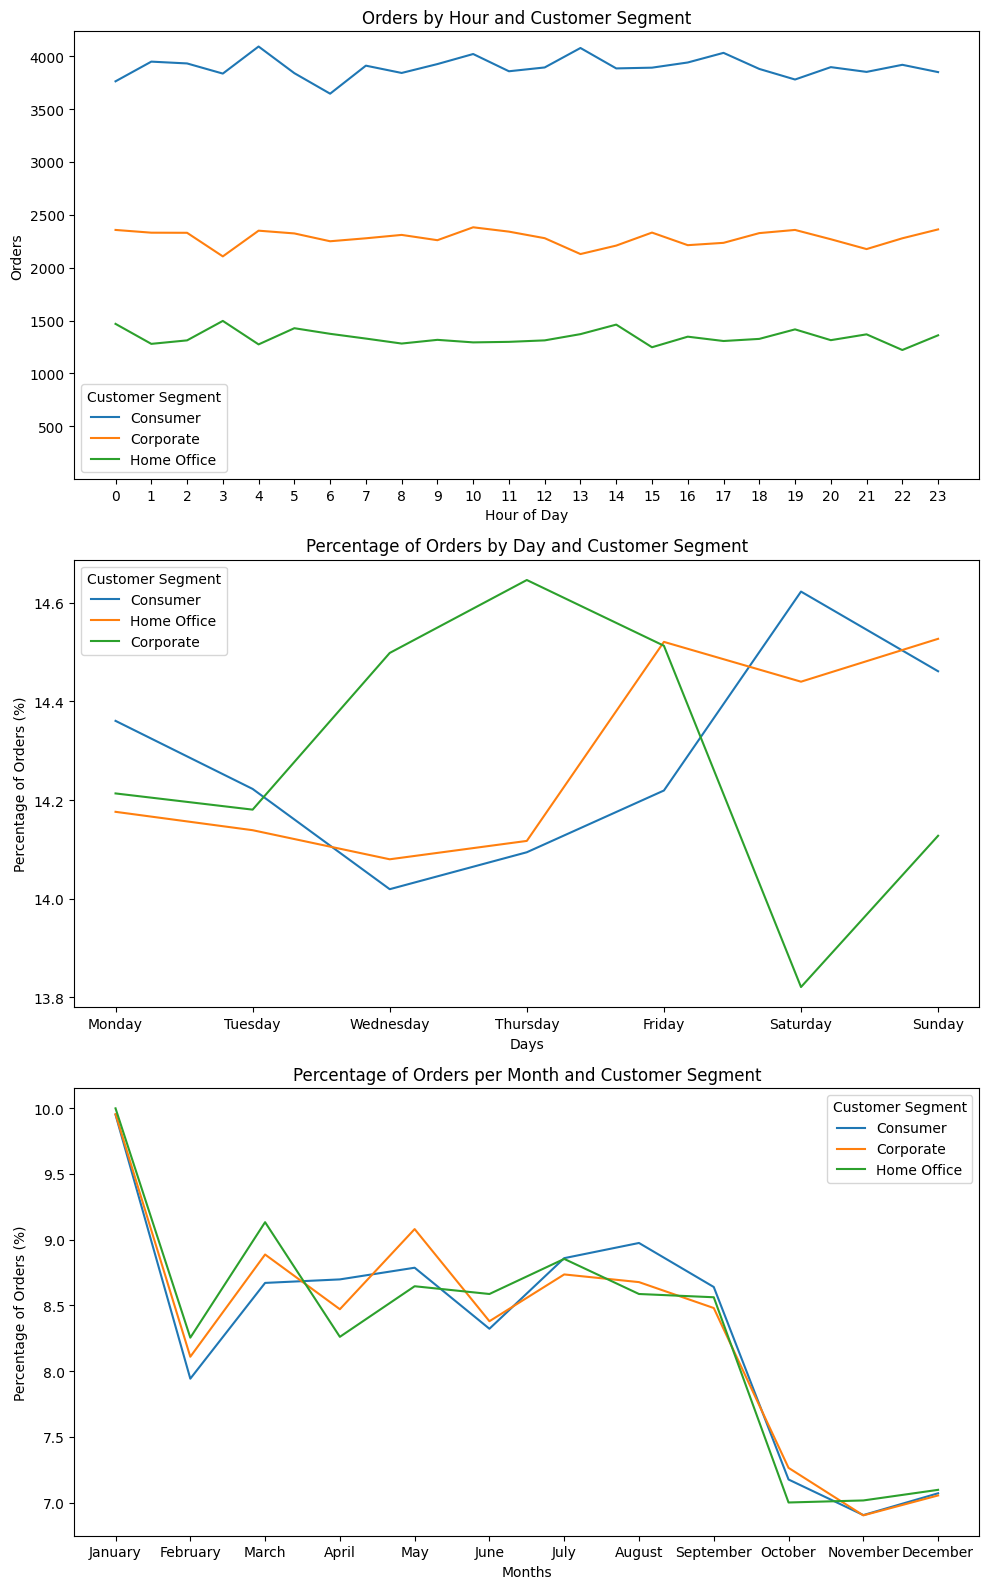

In [160]:
def plot_orders_by_time(df):
    fig, axes = plt.subplots(3, 1, figsize=(10, 16))

    # Hours
    hourly_purchases = df.groupby(['Customer Segment', 'Order Hour'])['Order Id'].count().reset_index()
    sns.lineplot(x='Order Hour', y='Order Id', hue='Customer Segment', data=hourly_purchases, ax=axes[0])
    axes[0].set_title('Orders by Hour and Customer Segment')
    axes[0].set_xlabel('Hour of Day')
    axes[0].set_ylabel('Orders')
    axes[0].set_xticks(range(24))
    axes[0].set_ylim(2, None)

    # Days
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_purchases = df.groupby(['Customer Segment', 'Order Day'])['Order Id'].count().reset_index()
    daily_purchases['Order Day'] = pd.Categorical(daily_purchases['Order Day'], categories=day_order, ordered=True)
    daily_purchases = daily_purchases.sort_values('Order Day')
    daily_purchases['Percentage'] = daily_purchases.groupby('Customer Segment')['Order Id'].transform(lambda x: (x / x.sum()) * 100)
    sns.lineplot(x='Order Day', y='Percentage', hue='Customer Segment', data=daily_purchases, ax=axes[1])
    axes[1].set_title('Percentage of Orders by Day and Customer Segment')
    axes[1].set_xlabel('Days')
    axes[1].set_ylabel('Percentage of Orders (%)')

    # Month
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    monthly_purchases = df.groupby(['Customer Segment', 'Order Month'])['Order Id'].count().reset_index()
    monthly_purchases['Order Month'] = pd.Categorical(monthly_purchases['Order Month'], categories=month_order, ordered=True)
    monthly_purchases = monthly_purchases.sort_values('Order Month')
    monthly_purchases['Percentage'] = monthly_purchases.groupby('Customer Segment')['Order Id'].transform(lambda x: (x / x.sum()) * 100)
    sns.lineplot(x='Order Month', y='Percentage', hue='Customer Segment', data=monthly_purchases, ax=axes[2])
    axes[2].set_title('Percentage of Orders per Month and Customer Segment')
    axes[2].set_xlabel('Months')
    axes[2].set_ylabel('Percentage of Orders (%)')

    plt.tight_layout()
    plt.show()

plot_orders_by_time(df1_filtered)


## DF2

In [161]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466728 entries, 0 to 469976
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Product     466728 non-null  object        
 1   Category    466728 non-null  object        
 2   Date        466728 non-null  datetime64[ns]
 3   Month       466728 non-null  object        
 4   Hour        466728 non-null  int64         
 5   Department  466728 non-null  object        
 6   ip          466728 non-null  object        
 7   url         466728 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 32.0+ MB


In [162]:
cate_col = df2.select_dtypes(include='object')
for col in cate_col:
  print(df2[col].value_counts())
  print('\n\n\n\n')

Product
Perfect Fitness Perfect Rip Deck                 27663
adidas Kids' RG III Mid Football Cleat           26006
Nike Men's Dri-FIT Victory Golf Polo             25424
Nike Men's CJ Elite 2 TD Football Cleat          25020
O'Brien Men's Neoprene Life Vest                 16073
                                                 ...  
Bag Boy M330 Push Cart                            1010
Bushnell Pro X7 Jolt Slope Rangefinder             927
Polar Loop Activity Tracker                        924
Garmin Forerunner 910XT GPS Watch                  867
Fitbit The One Wireless Activity & Sleep Trac      804
Name: count, Length: 76, dtype: int64





Category
cleats                  27663
shop by sport           26071
featured shops          26006
women's apparel         25424
men's footwear          25020
girls' apparel          24415
electronics             20725
indoor outdoor games    16073
water sports            16047
hunting & shooting      15537
camping & hiking        15417
fishi

In [163]:
url_ip = df2.groupby(['Department','url'])['ip'].count().reset_index()
url_ip.sort_values(by = 'ip')

,Department,url,ip
123,outdoors,/department/outdoors/category/kids'%20golf%20c...,221
135,outdoors,/department/outdoors/category/kids'%20golf%20c...,244
129,outdoors,/department/outdoors/category/kids'%20golf%20c...,255
125,outdoors,/department/outdoors/category/kids'%20golf%20c...,269
105,outdoors,/department/outdoors/category/golf%20gloves/pr...,273
...,...,...,...
14,fan shop,/department/fan%20shop/category/indoor/outdoor...,11492
4,apparel,/department/apparel/category/men's%20footwear/...,17755
66,golf,/department/golf/category/women's%20apparel/pr...,18184
2,apparel,/department/apparel/category/featured%20shops/...,18469


  Department  url     ip
0   apparel     6  78689
1  fan shop    12  78134
2   fitness    18  75965
3  footwear    20  78597
4      golf    12  75910
5  outdoors    84  79433


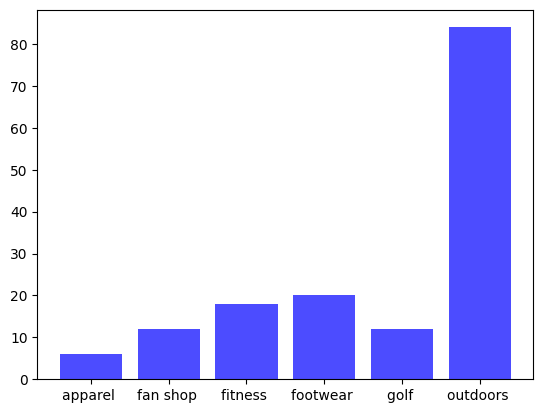

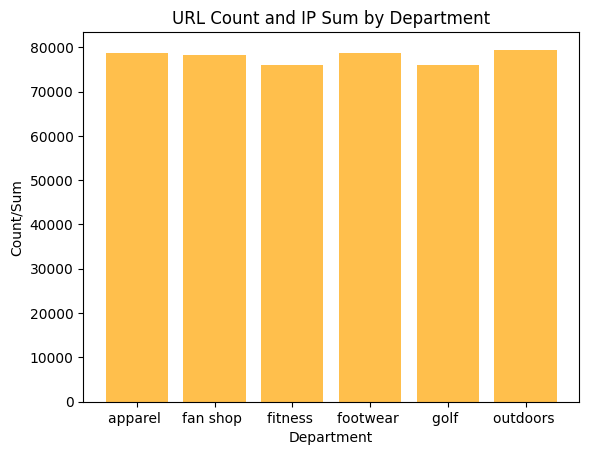

In [164]:
import matplotlib.pyplot as plt
depart_url_ip = url_ip.groupby('Department').agg({'url': 'count', 'ip': 'sum'}).reset_index()
print(depart_url_ip)
plt.bar(depart_url_ip['Department'], depart_url_ip['url'], color='blue', alpha=0.7, label='URL Count')
plt.show()
plt.bar(depart_url_ip['Department'], depart_url_ip['ip'], color='orange', alpha=0.7, label='IP Sum')
plt.xlabel('Department')
plt.ylabel('Count/Sum')
plt.title('URL Count and IP Sum by Department')
plt.show()

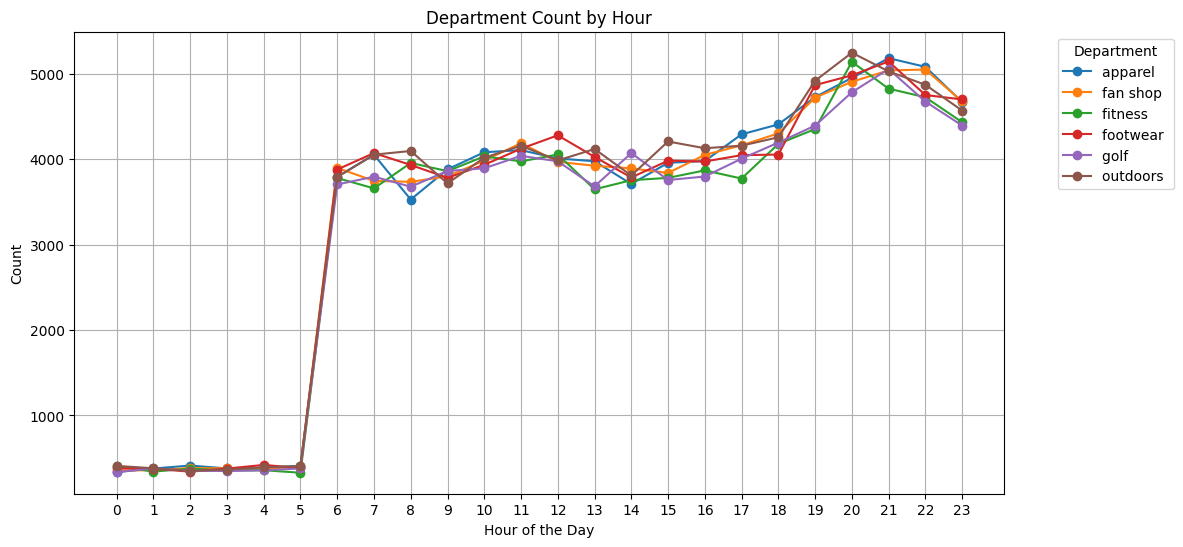

In [165]:
# Count occurrences of each department by hour
department_hour_counts = df2.groupby(['Department', 'Hour']).size().unstack(fill_value=0)

# Plot each department's count over hours as a line chart
plt.figure(figsize=(12, 6))

for department in department_hour_counts.index:
    plt.plot(department_hour_counts.columns, department_hour_counts.loc[department], marker='o', label=department)

plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.title("Department Count by Hour")
plt.xticks(department_hour_counts.columns)  # Ensure all hours are labeled
plt.legend(title="Department", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Vis da plot
plt.show()